# DEEP PROJECT NOTEBOOK


<!-- Project Description, issues, pictures, present CLIP, TPT, COOP and CoCa briefly. -->
# 1. Project Introduction
Over the last decades Deep Neural Networks have achieved outstanding results in many computer vision applications, such as image classification, object detection, image segmentation, tracking and anomaly detection. However these suffer from a severe performance degradation when tested on images that are of different distribution than the training data. This major issue known as **domain shift**, is a common problem in many real-world applications, such as autonomous driving, medical imaging, and robotics. To address the issue, recent research has studied domain adaptation techniques. These often require access to downstream training data, which is difficult to collect; hence, researchers have focused on **Test-Time Adaptation** (TTA) methods that adapt the pre-trained model to the target domain at test time.

We tested the zero-shot CLIP model by OpenAI [CLIP](https://github.com/openai/CLIP) on the ImageNetA and ImageNetV2 variants and evaluated the Top-1 accuracy of the dataset. Later, we improved it's performance by tuning the prompts with a prompt learner as described by Kaiyang et al. in [Learning to Prompt for Vision-Language Models](https://arxiv.org/pdf/2109.01134), this will be referred to as **Context Optimization (CoOp)**. Then we integrated [Test-Time Prompt Tuning](https://arxiv.org/pdf/2209.07511) proposed by Manli et al. both with and without CoOp. Lastly, our proposed method is an ensamble model of CLIP with CoOp and CoCa, that classifies a batch of image augmentations filtered on the entropy of the predictions. We tried stacking the logits of the filtered images with three different approaches: a standard deviation based approached proposed by Yang. et al. [Image-Caption Encoding for Improving Zero-Shot Generalisation](https://arxiv.org/pdf/2402.02662), a harmonic mean of the logits (ours) and an **entropy-weighted average** of the logits (ours) which achieved a **+2%** improvement in Top-1 accuracy.


Check if we can do this...
Otherwise copy and paste the functions

Import the main augmix operations directly from TPTs codebase

In [ ]:
# Some extra utils

class Py_vars():
    def __init__(self):
        self.imagenet_a_wnids = ['n01498041', 'n01531178', 'n01534433', 'n01558993', 'n01580077', 'n01614925', 'n01616318', 'n01631663', 'n01641577', 'n01669191', 'n01677366', 'n01687978', 'n01694178', 'n01698640', 'n01735189', 'n01770081', 'n01770393', 'n01774750', 'n01784675', 'n01819313', 'n01820546', 'n01833805', 'n01843383', 'n01847000', 'n01855672', 'n01882714', 'n01910747', 'n01914609', 'n01924916', 'n01944390', 'n01985128', 'n01986214', 'n02007558', 'n02009912', 'n02037110', 'n02051845', 'n02077923', 'n02085620', 'n02099601', 'n02106550', 'n02106662', 'n02110958', 'n02119022', 'n02123394', 'n02127052', 'n02129165', 'n02133161', 'n02137549', 'n02165456', 'n02174001', 'n02177972', 'n02190166', 'n02206856', 'n02219486', 'n02226429', 'n02231487', 'n02233338', 'n02236044', 'n02259212', 'n02268443', 'n02279972', 'n02280649', 'n02281787', 'n02317335', 'n02325366', 'n02346627', 'n02356798', 'n02361337', 'n02410509', 'n02445715', 'n02454379', 'n02486410', 'n02492035', 'n02504458', 'n02655020', 'n02669723', 'n02672831', 'n02676566', 'n02690373', 'n02701002', 'n02730930', 'n02777292', 'n02782093', 'n02787622', 'n02793495', 'n02797295', 'n02802426', 'n02814860', 'n02815834', 'n02837789', 'n02879718', 'n02883205', 'n02895154', 'n02906734', 'n02948072', 'n02951358', 'n02980441', 'n02992211', 'n02999410', 'n03014705', 'n03026506', 'n03124043', 'n03125729', 'n03187595', 'n03196217', 'n03223299', 'n03250847', 'n03255030', 'n03291819', 'n03325584', 'n03355925', 'n03384352', 'n03388043', 'n03417042', 'n03443371', 'n03444034', 'n03445924', 'n03452741', 'n03483316', 'n03584829', 'n03590841', 'n03594945', 'n03617480', 'n03666591', 'n03670208', 'n03717622', 'n03720891', 'n03721384', 'n03724870', 'n03775071', 'n03788195', 'n03804744', 'n03837869', 'n03840681', 'n03854065', 'n03888257', 'n03891332', 'n03935335', 'n03982430', 'n04019541', 'n04033901', 'n04039381', 'n04067472', 'n04086273', 'n04099969', 'n04118538', 'n04131690', 'n04133789', 'n04141076', 'n04146614', 'n04147183', 'n04179913', 'n04208210', 'n04235860', 'n04252077', 'n04252225', 'n04254120', 'n04270147', 'n04275548', 'n04310018', 'n04317175', 'n04344873', 'n04347754', 'n04355338', 'n04366367', 'n04376876', 'n04389033', 'n04399382', 'n04442312', 'n04456115', 'n04482393', 'n04507155', 'n04509417', 'n04532670', 'n04540053', 'n04554684', 'n04562935', 'n04591713', 'n04606251', 'n07583066', 'n07695742', 'n07697313', 'n07697537', 'n07714990', 'n07718472', 'n07720875', 'n07734744', 'n07749582', 'n07753592', 'n07760859', 'n07768694', 'n07831146', 'n09229709', 'n09246464', 'n09472597', 'n09835506', 'n11879895', 'n12057211', 'n12144580', 'n12267677']

        self.all_wnids = ['n01440764', 'n01443537', 'n01484850', 'n01491361', 'n01494475', 'n01496331', 'n01498041', 'n01514668', 'n01514859', 'n01518878', 'n01530575', 'n01531178', 'n01532829', 'n01534433', 'n01537544', 'n01558993', 'n01560419', 'n01580077', 'n01582220', 'n01592084', 'n01601694', 'n01608432', 'n01614925', 'n01616318', 'n01622779', 'n01629819', 'n01630670', 'n01631663', 'n01632458', 'n01632777', 'n01641577', 'n01644373', 'n01644900', 'n01664065', 'n01665541', 'n01667114', 'n01667778', 'n01669191', 'n01675722', 'n01677366', 'n01682714', 'n01685808', 'n01687978', 'n01688243', 'n01689811', 'n01692333', 'n01693334', 'n01694178', 'n01695060', 'n01697457', 'n01698640', 'n01704323', 'n01728572', 'n01728920', 'n01729322', 'n01729977', 'n01734418', 'n01735189', 'n01737021', 'n01739381', 'n01740131', 'n01742172', 'n01744401', 'n01748264', 'n01749939', 'n01751748', 'n01753488', 'n01755581', 'n01756291', 'n01768244', 'n01770081', 'n01770393', 'n01773157', 'n01773549', 'n01773797', 'n01774384', 'n01774750', 'n01775062', 'n01776313', 'n01784675', 'n01795545', 'n01796340', 'n01797886', 'n01798484', 'n01806143', 'n01806567', 'n01807496', 'n01817953', 'n01818515', 'n01819313', 'n01820546', 'n01824575', 'n01828970', 'n01829413', 'n01833805', 'n01843065', 'n01843383', 'n01847000', 'n01855032', 'n01855672', 'n01860187', 'n01871265', 'n01872401', 'n01873310', 'n01877812', 'n01882714', 'n01883070', 'n01910747', 'n01914609', 'n01917289', 'n01924916', 'n01930112', 'n01943899', 'n01944390', 'n01945685', 'n01950731', 'n01955084', 'n01968897', 'n01978287', 'n01978455', 'n01980166', 'n01981276', 'n01983481', 'n01984695', 'n01985128', 'n01986214', 'n01990800', 'n02002556', 'n02002724', 'n02006656', 'n02007558', 'n02009229', 'n02009912', 'n02011460', 'n02012849', 'n02013706', 'n02017213', 'n02018207', 'n02018795', 'n02025239', 'n02027492', 'n02028035', 'n02033041', 'n02037110', 'n02051845', 'n02056570', 'n02058221', 'n02066245', 'n02071294', 'n02074367', 'n02077923', 'n02085620', 'n02085782', 'n02085936', 'n02086079', 'n02086240', 'n02086646', 'n02086910', 'n02087046', 'n02087394', 'n02088094', 'n02088238', 'n02088364', 'n02088466', 'n02088632', 'n02089078', 'n02089867', 'n02089973', 'n02090379', 'n02090622', 'n02090721', 'n02091032', 'n02091134', 'n02091244', 'n02091467', 'n02091635', 'n02091831', 'n02092002', 'n02092339', 'n02093256', 'n02093428', 'n02093647', 'n02093754', 'n02093859', 'n02093991', 'n02094114', 'n02094258', 'n02094433', 'n02095314', 'n02095570', 'n02095889', 'n02096051', 'n02096177', 'n02096294', 'n02096437', 'n02096585', 'n02097047', 'n02097130', 'n02097209', 'n02097298', 'n02097474', 'n02097658', 'n02098105', 'n02098286', 'n02098413', 'n02099267', 'n02099429', 'n02099601', 'n02099712', 'n02099849', 'n02100236', 'n02100583', 'n02100735', 'n02100877', 'n02101006', 'n02101388', 'n02101556', 'n02102040', 'n02102177', 'n02102318', 'n02102480', 'n02102973', 'n02104029', 'n02104365', 'n02105056', 'n02105162', 'n02105251', 'n02105412', 'n02105505', 'n02105641', 'n02105855', 'n02106030', 'n02106166', 'n02106382', 'n02106550', 'n02106662', 'n02107142', 'n02107312', 'n02107574', 'n02107683', 'n02107908', 'n02108000', 'n02108089', 'n02108422', 'n02108551', 'n02108915', 'n02109047', 'n02109525', 'n02109961', 'n02110063', 'n02110185', 'n02110341', 'n02110627', 'n02110806', 'n02110958', 'n02111129', 'n02111277', 'n02111500', 'n02111889', 'n02112018', 'n02112137', 'n02112350', 'n02112706', 'n02113023', 'n02113186', 'n02113624', 'n02113712', 'n02113799', 'n02113978', 'n02114367', 'n02114548', 'n02114712', 'n02114855', 'n02115641', 'n02115913', 'n02116738', 'n02117135', 'n02119022', 'n02119789', 'n02120079', 'n02120505', 'n02123045', 'n02123159', 'n02123394', 'n02123597', 'n02124075', 'n02125311', 'n02127052', 'n02128385', 'n02128757', 'n02128925', 'n02129165', 'n02129604', 'n02130308', 'n02132136', 'n02133161', 'n02134084', 'n02134418', 'n02137549', 'n02138441', 'n02165105', 'n02165456', 'n02167151', 'n02168699', 'n02169497', 'n02172182', 'n02174001', 'n02177972', 'n02190166', 'n02206856', 'n02219486', 'n02226429', 'n02229544', 'n02231487', 'n02233338', 'n02236044', 'n02256656', 'n02259212', 'n02264363', 'n02268443', 'n02268853', 'n02276258', 'n02277742', 'n02279972', 'n02280649', 'n02281406', 'n02281787', 'n02317335', 'n02319095', 'n02321529', 'n02325366', 'n02326432', 'n02328150', 'n02342885', 'n02346627', 'n02356798', 'n02361337', 'n02363005', 'n02364673', 'n02389026', 'n02391049', 'n02395406', 'n02396427', 'n02397096', 'n02398521', 'n02403003', 'n02408429', 'n02410509', 'n02412080', 'n02415577', 'n02417914', 'n02422106', 'n02422699', 'n02423022', 'n02437312', 'n02437616', 'n02441942', 'n02442845', 'n02443114', 'n02443484', 'n02444819', 'n02445715', 'n02447366', 'n02454379', 'n02457408', 'n02480495', 'n02480855', 'n02481823', 'n02483362', 'n02483708', 'n02484975', 'n02486261', 'n02486410', 'n02487347', 'n02488291', 'n02488702', 'n02489166', 'n02490219', 'n02492035', 'n02492660', 'n02493509', 'n02493793', 'n02494079', 'n02497673', 'n02500267', 'n02504013', 'n02504458', 'n02509815', 'n02510455', 'n02514041', 'n02526121', 'n02536864', 'n02606052', 'n02607072', 'n02640242', 'n02641379', 'n02643566', 'n02655020', 'n02666196', 'n02667093', 'n02669723', 'n02672831', 'n02676566', 'n02687172', 'n02690373', 'n02692877', 'n02699494', 'n02701002', 'n02704792', 'n02708093', 'n02727426', 'n02730930', 'n02747177', 'n02749479', 'n02769748', 'n02776631', 'n02777292', 'n02782093', 'n02783161', 'n02786058', 'n02787622', 'n02788148', 'n02790996', 'n02791124', 'n02791270', 'n02793495', 'n02794156', 'n02795169', 'n02797295', 'n02799071', 'n02802426', 'n02804414', 'n02804610', 'n02807133', 'n02808304', 'n02808440', 'n02814533', 'n02814860', 'n02815834', 'n02817516', 'n02823428', 'n02823750', 'n02825657', 'n02834397', 'n02835271', 'n02837789', 'n02840245', 'n02841315', 'n02843684', 'n02859443', 'n02860847', 'n02865351', 'n02869837', 'n02870880', 'n02871525', 'n02877765', 'n02879718', 'n02883205', 'n02892201', 'n02892767', 'n02894605', 'n02895154', 'n02906734', 'n02909870', 'n02910353', 'n02916936', 'n02917067', 'n02927161', 'n02930766', 'n02939185', 'n02948072', 'n02950826', 'n02951358', 'n02951585', 'n02963159', 'n02965783', 'n02966193', 'n02966687', 'n02971356', 'n02974003', 'n02977058', 'n02978881', 'n02979186', 'n02980441', 'n02981792', 'n02988304', 'n02992211', 'n02992529', 'n02999410', 'n03000134', 'n03000247', 'n03000684', 'n03014705', 'n03016953', 'n03017168', 'n03018349', 'n03026506', 'n03028079', 'n03032252', 'n03041632', 'n03042490', 'n03045698', 'n03047690', 'n03062245', 'n03063599', 'n03063689', 'n03065424', 'n03075370', 'n03085013', 'n03089624', 'n03095699', 'n03100240', 'n03109150', 'n03110669', 'n03124043', 'n03124170', 'n03125729', 'n03126707', 'n03127747', 'n03127925', 'n03131574', 'n03133878', 'n03134739', 'n03141823', 'n03146219', 'n03160309', 'n03179701', 'n03180011', 'n03187595', 'n03188531', 'n03196217', 'n03197337', 'n03201208', 'n03207743', 'n03207941', 'n03208938', 'n03216828', 'n03218198', 'n03220513', 'n03223299', 'n03240683', 'n03249569', 'n03250847', 'n03255030', 'n03259280', 'n03271574', 'n03272010', 'n03272562', 'n03290653', 'n03291819', 'n03297495', 'n03314780', 'n03325584', 'n03337140', 'n03344393', 'n03345487', 'n03347037', 'n03355925', 'n03372029', 'n03376595', 'n03379051', 'n03384352', 'n03388043', 'n03388183', 'n03388549', 'n03393912', 'n03394916', 'n03400231', 'n03404251', 'n03417042', 'n03424325', 'n03425413', 'n03443371', 'n03444034', 'n03445777', 'n03445924', 'n03447447', 'n03447721', 'n03450230', 'n03452741', 'n03457902', 'n03459775', 'n03461385', 'n03467068', 'n03476684', 'n03476991', 'n03478589', 'n03481172', 'n03482405', 'n03483316', 'n03485407', 'n03485794', 'n03492542', 'n03494278', 'n03495258', 'n03496892', 'n03498962', 'n03527444', 'n03529860', 'n03530642', 'n03532672', 'n03534580', 'n03535780', 'n03538406', 'n03544143', 'n03584254', 'n03584829', 'n03590841', 'n03594734', 'n03594945', 'n03595614', 'n03598930', 'n03599486', 'n03602883', 'n03617480', 'n03623198', 'n03627232', 'n03630383', 'n03633091', 'n03637318', 'n03642806', 'n03649909', 'n03657121', 'n03658185', 'n03661043', 'n03662601', 'n03666591', 'n03670208', 'n03673027', 'n03676483', 'n03680355', 'n03690938', 'n03691459', 'n03692522', 'n03697007', 'n03706229', 'n03709823', 'n03710193', 'n03710637', 'n03710721', 'n03717622', 'n03720891', 'n03721384', 'n03724870', 'n03729826', 'n03733131', 'n03733281', 'n03733805', 'n03742115', 'n03743016', 'n03759954', 'n03761084', 'n03763968', 'n03764736', 'n03769881', 'n03770439', 'n03770679', 'n03773504', 'n03775071', 'n03775546', 'n03776460', 'n03777568', 'n03777754', 'n03781244', 'n03782006', 'n03785016', 'n03786901', 'n03787032', 'n03788195', 'n03788365', 'n03791053', 'n03792782', 'n03792972', 'n03793489', 'n03794056', 'n03796401', 'n03803284', 'n03804744', 'n03814639', 'n03814906', 'n03825788', 'n03832673', 'n03837869', 'n03838899', 'n03840681', 'n03841143', 'n03843555', 'n03854065', 'n03857828', 'n03866082', 'n03868242', 'n03868863', 'n03871628', 'n03873416', 'n03874293', 'n03874599', 'n03876231', 'n03877472', 'n03877845', 'n03884397', 'n03887697', 'n03888257', 'n03888605', 'n03891251', 'n03891332', 'n03895866', 'n03899768', 'n03902125', 'n03903868', 'n03908618', 'n03908714', 'n03916031', 'n03920288', 'n03924679', 'n03929660', 'n03929855', 'n03930313', 'n03930630', 'n03933933', 'n03935335', 'n03937543', 'n03938244', 'n03942813', 'n03944341', 'n03947888', 'n03950228', 'n03954731', 'n03956157', 'n03958227', 'n03961711', 'n03967562', 'n03970156', 'n03976467', 'n03976657', 'n03977966', 'n03980874', 'n03982430', 'n03983396', 'n03991062', 'n03992509', 'n03995372', 'n03998194', 'n04004767', 'n04005630', 'n04008634', 'n04009552', 'n04019541', 'n04023962', 'n04026417', 'n04033901', 'n04033995', 'n04037443', 'n04039381', 'n04040759', 'n04041544', 'n04044716', 'n04049303', 'n04065272', 'n04067472', 'n04069434', 'n04070727', 'n04074963', 'n04081281', 'n04086273', 'n04090263', 'n04099969', 'n04111531', 'n04116512', 'n04118538', 'n04118776', 'n04120489', 'n04125021', 'n04127249', 'n04131690', 'n04133789', 'n04136333', 'n04141076', 'n04141327', 'n04141975', 'n04146614', 'n04147183', 'n04149813', 'n04152593', 'n04153751', 'n04154565', 'n04162706', 'n04179913', 'n04192698', 'n04200800', 'n04201297', 'n04204238', 'n04204347', 'n04208210', 'n04209133', 'n04209239', 'n04228054', 'n04229816', 'n04235860', 'n04238763', 'n04239074', 'n04243546', 'n04251144', 'n04252077', 'n04252225', 'n04254120', 'n04254680', 'n04254777', 'n04258138', 'n04259630', 'n04263257', 'n04264628', 'n04265275', 'n04266014', 'n04270147', 'n04273569', 'n04275548', 'n04277352', 'n04285008', 'n04286575', 'n04296562', 'n04310018', 'n04311004', 'n04311174', 'n04317175', 'n04325704', 'n04326547', 'n04328186', 'n04330267', 'n04332243', 'n04335435', 'n04336792', 'n04344873', 'n04346328', 'n04347754', 'n04350905', 'n04355338', 'n04355933', 'n04356056', 'n04357314', 'n04366367', 'n04367480', 'n04370456', 'n04371430', 'n04371774', 'n04372370', 'n04376876', 'n04380533', 'n04389033', 'n04392985', 'n04398044', 'n04399382', 'n04404412', 'n04409515', 'n04417672', 'n04418357', 'n04423845', 'n04428191', 'n04429376', 'n04435653', 'n04442312', 'n04443257', 'n04447861', 'n04456115', 'n04458633', 'n04461696', 'n04462240', 'n04465501', 'n04467665', 'n04476259', 'n04479046', 'n04482393', 'n04483307', 'n04485082', 'n04486054', 'n04487081', 'n04487394', 'n04493381', 'n04501370', 'n04505470', 'n04507155', 'n04509417', 'n04515003', 'n04517823', 'n04522168', 'n04523525', 'n04525038', 'n04525305', 'n04532106', 'n04532670', 'n04536866', 'n04540053', 'n04542943', 'n04548280', 'n04548362', 'n04550184', 'n04552348', 'n04553703', 'n04554684', 'n04557648', 'n04560804', 'n04562935', 'n04579145', 'n04579432', 'n04584207', 'n04589890', 'n04590129', 'n04591157', 'n04591713', 'n04592741', 'n04596742', 'n04597913', 'n04599235', 'n04604644', 'n04606251', 'n04612504', 'n04613696', 'n06359193', 'n06596364', 'n06785654', 'n06794110', 'n06874185', 'n07248320', 'n07565083', 'n07579787', 'n07583066', 'n07584110', 'n07590611', 'n07613480', 'n07614500', 'n07615774', 'n07684084', 'n07693725', 'n07695742', 'n07697313', 'n07697537', 'n07711569', 'n07714571', 'n07714990', 'n07715103', 'n07716358', 'n07716906', 'n07717410', 'n07717556', 'n07718472', 'n07718747', 'n07720875', 'n07730033', 'n07734744', 'n07742313', 'n07745940', 'n07747607', 'n07749582', 'n07753113', 'n07753275', 'n07753592', 'n07754684', 'n07760859', 'n07768694', 'n07802026', 'n07831146', 'n07836838', 'n07860988', 'n07871810', 'n07873807', 'n07875152', 'n07880968', 'n07892512', 'n07920052', 'n07930864', 'n07932039', 'n09193705', 'n09229709', 'n09246464', 'n09256479', 'n09288635', 'n09332890', 'n09399592', 'n09421951', 'n09428293', 'n09468604', 'n09472597', 'n09835506', 'n10148035', 'n10565667', 'n11879895', 'n11939491', 'n12057211', 'n12144580', 'n12267677', 'n12620546', 'n12768682', 'n12985857', 'n12998815', 'n13037406', 'n13040303', 'n13044778', 'n13052670', 'n13054560', 'n13133613', 'n15075141']

        self.num2class = {"n01498041": "stingray", 
            "n01531178": "goldfinch", 
            "n01534433": "junco", 
            "n01558993": "American robin", 
            "n01580077": "jay", 
            "n01614925": "bald eagle", 
            "n01616318": "vulture", 
            "n01631663": "newt", 
            "n01641577": "American bullfrog", 
            "n01669191": "box turtle", 
            "n01677366": "green iguana", 
            "n01687978": "agama", 
            "n01694178": "chameleon", 
            "n01698640": "American alligator", 
            "n01735189": "garter snake", 
            "n01770081": "harvestman", 
            "n01770393": "scorpion", 
            "n01774750": "tarantula", 
            "n01784675": "centipede", 
            "n01819313": "sulphur-crested cockatoo", 
            "n01820546": "lorikeet", 
            "n01833805": "hummingbird", 
            "n01843383": "toucan", 
            "n01847000": "duck", 
            "n01855672": "goose", 
            "n01882714": "koala", 
            "n01910747": "jellyfish", 
            "n01914609": "sea anemone", 
            "n01924916": "flatworm", 
            "n01944390": "snail", 
            "n01985128": "crayfish", 
            "n01986214": "hermit crab", 
            "n02007558": "flamingo", 
            "n02009912": "great egret", 
            "n02037110": "oystercatcher", 
            "n02051845": "pelican", 
            "n02077923": "sea lion", 
            "n02085620": "Chihuahua", 
            "n02099601": "Golden Retriever", 
            "n02106550": "Rottweiler", 
            "n02106662": "German Shepherd Dog", 
            "n02110958": "pug", 
            "n02119022": "red fox", 
            "n02123394": "Persian cat", 
            "n02127052": "lynx", 
            "n02129165": "lion", 
            "n02133161": "American black bear", 
            "n02137549": "mongoose", 
            "n02165456": "ladybug", 
            "n02174001": "rhinoceros beetle", 
            "n02177972": "weevil", 
            "n02190166": "fly", 
            "n02206856": "bee", 
            "n02219486": "ant", 
            "n02226429": "grasshopper", 
            "n02231487": "stick insect", 
            "n02233338": "cockroach", 
            "n02236044": "mantis", 
            "n02259212": "leafhopper", 
            "n02268443": "dragonfly", 
            "n02279972": "monarch butterfly", 
            "n02280649": "small white", 
            "n02281787": "gossamer-winged butterfly", 
            "n02317335": "starfish", 
            "n02325366": "cottontail rabbit", 
            "n02346627": "porcupine", 
            "n02356798": "fox squirrel", 
            "n02361337": "marmot", 
            "n02410509": "bison", 
            "n02445715": "skunk", 
            "n02454379": "armadillo", 
            "n02486410": "baboon", 
            "n02492035": "white-headed capuchin", 
            "n02504458": "African bush elephant", 
            "n02655020": "pufferfish", 
            "n02669723": "academic gown", 
            "n02672831": "accordion", 
            "n02676566": "acoustic guitar", 
            "n02690373": "airliner", 
            "n02701002": "ambulance", 
            "n02730930": "apron", 
            "n02777292": "balance beam", 
            "n02782093": "balloon", 
            "n02787622": "banjo", 
            "n02793495": "barn", 
            "n02797295": "wheelbarrow", 
            "n02802426": "basketball", 
            "n02814860": "lighthouse", 
            "n02815834": "beaker", 
            "n02837789": "bikini", 
            "n02879718": "bow", 
            "n02883205": "bow tie", 
            "n02895154": "breastplate", 
            "n02906734": "broom", 
            "n02948072": "candle", 
            "n02951358": "canoe", 
            "n02980441": "castle", 
            "n02992211": "cello", 
            "n02999410": "chain", 
            "n03014705": "chest", 
            "n03026506": "Christmas stocking", 
            "n03124043": "cowboy boot", 
            "n03125729": "cradle", 
            "n03187595": "rotary dial telephone", 
            "n03196217": "digital clock", 
            "n03223299": "doormat", 
            "n03250847": "drumstick", 
            "n03255030": "dumbbell", 
            "n03291819": "envelope", 
            "n03325584": "feather boa", 
            "n03355925": "flagpole", 
            "n03384352": "forklift", 
            "n03388043": "fountain", 
            "n03417042": "garbage truck", 
            "n03443371": "goblet", 
            "n03444034": "go-kart", 
            "n03445924": "golf cart", 
            "n03452741": "grand piano", 
            "n03483316": "hair dryer", 
            "n03584829": "clothes iron", 
            "n03590841": "jack-o'-lantern", 
            "n03594945": "jeep", 
            "n03617480": "kimono", 
            "n03666591": "lighter", 
            "n03670208": "limousine", 
            "n03717622": "manhole cover", 
            "n03720891": "maraca", 
            "n03721384": "marimba", 
            "n03724870": "mask", 
            "n03775071": "mitten", 
            "n03788195": "mosque", 
            "n03804744": "nail", 
            "n03837869": "obelisk", 
            "n03840681": "ocarina", 
            "n03854065": "organ", 
            "n03888257": "parachute", 
            "n03891332": "parking meter", 
            "n03935335": "piggy bank", 
            "n03982430": "billiard table", 
            "n04019541": "hockey puck", 
            "n04033901": "quill", 
            "n04039381": "racket", 
            "n04067472": "reel", 
            "n04086273": "revolver", 
            "n04099969": "rocking chair", 
            "n04118538": "rugby ball", 
            "n04131690": "salt shaker", 
            "n04133789": "sandal", 
            "n04141076": "saxophone", 
            "n04146614": "school bus", 
            "n04147183": "schooner", 
            "n04179913": "sewing machine", 
            "n04208210": "shovel", 
            "n04235860": "sleeping bag", 
            "n04252077": "snowmobile", 
            "n04252225": "snowplow", 
            "n04254120": "soap dispenser", 
            "n04270147": "spatula", 
            "n04275548": "spider web", 
            "n04310018": "steam locomotive", 
            "n04317175": "stethoscope", 
            "n04344873": "couch", 
            "n04347754": "submarine", 
            "n04355338": "sundial", 
            "n04366367": "suspension bridge", 
            "n04376876": "syringe", 
            "n04389033": "tank", 
            "n04399382": "teddy bear", 
            "n04442312": "toaster", 
            "n04456115": "torch", 
            "n04482393": "tricycle", 
            "n04507155": "umbrella", 
            "n04509417": "unicycle", 
            "n04532670": "viaduct", 
            "n04540053": "volleyball", 
            "n04554684": "washing machine", 
            "n04562935": "water tower", 
            "n04591713": "wine bottle", 
            "n04606251": "shipwreck", 
            "n07583066": "guacamole", 
            "n07695742": "pretzel", 
            "n07697313": "cheeseburger", 
            "n07697537": "hot dog", 
            "n07714990": "broccoli", 
            "n07718472": "cucumber", 
            "n07720875": "bell pepper", 
            "n07734744": "mushroom", 
            "n07749582": "lemon", 
            "n07753592": "banana", 
            "n07760859": "custard apple", 
            "n07768694": "pomegranate", 
            "n07831146": "carbonara", 
            "n09229709": "bubble", 
            "n09246464": "cliff", 
            "n09472597": "volcano", 
            "n09835506": "baseball player", 
            "n11879895": "rapeseed", 
            "n12057211": "yellow lady's slipper", 
            "n12144580": "corn", 
            "n12267677": "acorn"
        }

        self.num2class_v2 = {0: 'tench', 1: 'goldfish', 2: 'great white shark', 3: 'tiger shark', 4: 'hammerhead', 5: 'electric ray', 6: 'stingray', 7: 'cock', 8: 'hen', 9: 'ostrich', 10: 'brambling', 11: 'goldfinch', 12: 'house finch', 13: 'junco', 14: 'indigo bunting', 15: 'robin', 16: 'bulbul', 17: 'jay', 18: 'magpie', 19: 'chickadee', 20: 'water ouzel', 21: 'kite', 22: 'bald eagle', 23: 'vulture', 24: 'great grey owl', 25: 'European fire salamander', 26: 'common newt', 27: 'eft', 28: 'spotted salamander', 29: 'axolotl', 30: 'bullfrog', 31: 'tree frog', 32: 'tailed frog', 33: 'loggerhead', 34: 'leatherback turtle', 35: 'mud turtle', 36: 'terrapin', 37: 'box turtle', 38: 'banded gecko', 39: 'common iguana', 40: 'American chameleon', 41: 'whiptail', 42: 'agama', 43: 'frilled lizard', 44: 'alligator lizard', 45: 'Gila monster', 46: 'green lizard', 47: 'African chameleon', 48: 'Komodo dragon', 49: 'African crocodile', 50: 'American alligator', 51: 'triceratops', 52: 'thunder snake', 53: 'ringneck snake', 54: 'hognose snake', 55: 'green snake', 56: 'king snake', 57: 'garter snake', 58: 'water snake', 59: 'vine snake', 60: 'night snake', 61: 'boa constrictor', 62: 'rock python', 63: 'Indian cobra', 64: 'green mamba', 65: 'sea snake', 66: 'horned viper', 67: 'diamondback', 68: 'sidewinder', 69: 'trilobite', 70: 'harvestman', 71: 'scorpion', 72: 'black and gold garden spider', 73: 'barn spider', 74: 'garden spider', 75: 'black widow', 76: 'tarantula', 77: 'wolf spider', 78: 'tick', 79: 'centipede', 80: 'black grouse', 81: 'ptarmigan', 82: 'ruffed grouse', 83: 'prairie chicken', 84: 'peacock', 85: 'quail', 86: 'partridge', 87: 'African grey', 88: 'macaw', 89: 'sulphur-crested cockatoo', 90: 'lorikeet', 91: 'coucal', 92: 'bee eater', 93: 'hornbill', 94: 'hummingbird', 95: 'jacamar', 96: 'toucan', 97: 'drake', 98: 'red-breasted merganser', 99: 'goose', 100: 'black swan', 101: 'tusker', 102: 'echidna', 103: 'platypus', 104: 'wallaby', 105: 'koala', 106: 'wombat', 107: 'jellyfish', 108: 'sea anemone', 109: 'brain coral', 110: 'flatworm', 111: 'nematode', 112: 'conch', 113: 'snail', 114: 'slug', 115: 'sea slug', 116: 'chiton', 117: 'chambered nautilus', 118: 'Dungeness crab', 119: 'rock crab', 120: 'fiddler crab', 121: 'king crab', 122: 'American lobster', 123: 'spiny lobster', 124: 'crayfish', 125: 'hermit crab', 126: 'isopod', 127: 'white stork', 128: 'black stork', 129: 'spoonbill', 130: 'flamingo', 131: 'little blue heron', 132: 'American egret', 133: 'bittern', 134: 'crane', 135: 'limpkin', 136: 'European gallinule', 137: 'American coot', 138: 'bustard', 139: 'ruddy turnstone', 140: 'red-backed sandpiper', 141: 'redshank', 142: 'dowitcher', 143: 'oystercatcher', 144: 'pelican', 145: 'king penguin', 146: 'albatross', 147: 'grey whale', 148: 'killer whale', 149: 'dugong', 150: 'sea lion', 151: 'Chihuahua', 152: 'Japanese spaniel', 153: 'Maltese dog', 154: 'Pekinese', 155: 'Shih-Tzu', 156: 'Blenheim spaniel', 157: 'papillon', 158: 'toy terrier', 159: 'Rhodesian ridgeback', 160: 'Afghan hound', 161: 'basset', 162: 'beagle', 163: 'bloodhound', 164: 'bluetick', 165: 'black-and-tan coonhound', 166: 'Walker hound', 167: 'English foxhound', 168: 'redbone', 169: 'borzoi', 170: 'Irish wolfhound', 171: 'Italian greyhound', 172: 'whippet', 173: 'Ibizan hound', 174: 'Norwegian elkhound', 175: 'otterhound', 176: 'Saluki', 177: 'Scottish deerhound', 178: 'Weimaraner', 179: 'Staffordshire bullterrier', 180: 'American Staffordshire terrier', 181: 'Bedlington terrier', 182: 'Border terrier', 183: 'Kerry blue terrier', 184: 'Irish terrier', 185: 'Norfolk terrier', 186: 'Norwich terrier', 187: 'Yorkshire terrier', 188: 'wire-haired fox terrier', 189: 'Lakeland terrier', 190: 'Sealyham terrier', 191: 'Airedale', 192: 'cairn', 193: 'Australian terrier', 194: 'Dandie Dinmont', 195: 'Boston bull', 196: 'miniature schnauzer', 197: 'giant schnauzer', 198: 'standard schnauzer', 199: 'Scotch terrier', 200: 'Tibetan terrier', 201: 'silky terrier', 202: 'soft-coated wheaten terrier', 203: 'West Highland white terrier', 204: 'Lhasa', 205: 'flat-coated retriever', 206: 'curly-coated retriever', 207: 'golden retriever', 208: 'Labrador retriever', 209: 'Chesapeake Bay retriever', 210: 'German short-haired pointer', 211: 'vizsla', 212: 'English setter', 213: 'Irish setter', 214: 'Gordon setter', 215: 'Brittany spaniel', 216: 'clumber', 217: 'English springer', 218: 'Welsh springer spaniel', 219: 'cocker spaniel', 220: 'Sussex spaniel', 221: 'Irish water spaniel', 222: 'kuvasz', 223: 'schipperke', 224: 'groenendael', 225: 'malinois', 226: 'briard', 227: 'kelpie', 228: 'komondor', 229: 'Old English sheepdog', 230: 'Shetland sheepdog', 231: 'collie', 232: 'Border collie', 233: 'Bouvier des Flandres', 234: 'Rottweiler', 235: 'German shepherd', 236: 'Doberman', 237: 'miniature pinscher', 238: 'Greater Swiss Mountain dog', 239: 'Bernese mountain dog', 240: 'Appenzeller', 241: 'EntleBucher', 242: 'boxer', 243: 'bull mastiff', 244: 'Tibetan mastiff', 245: 'French bulldog', 246: 'Great Dane', 247: 'Saint Bernard', 248: 'Eskimo dog', 249: 'malamute', 250: 'Siberian husky', 251: 'dalmatian', 252: 'affenpinscher', 253: 'basenji', 254: 'pug', 255: 'Leonberg', 256: 'Newfoundland', 257: 'Great Pyrenees', 258: 'Samoyed', 259: 'Pomeranian', 260: 'chow', 261: 'keeshond', 262: 'Brabancon griffon', 263: 'Pembroke', 264: 'Cardigan', 265: 'toy poodle', 266: 'miniature poodle', 267: 'standard poodle', 268: 'Mexican hairless', 269: 'timber wolf', 270: 'white wolf', 271: 'red wolf', 272: 'coyote', 273: 'dingo', 274: 'dhole', 275: 'African hunting dog', 276: 'hyena', 277: 'red fox', 278: 'kit fox', 279: 'Arctic fox', 280: 'grey fox', 281: 'tabby', 282: 'tiger cat', 283: 'Persian cat', 284: 'Siamese cat', 285: 'Egyptian cat', 286: 'cougar', 287: 'lynx', 288: 'leopard', 289: 'snow leopard', 290: 'jaguar', 291: 'lion', 292: 'tiger', 293: 'cheetah', 294: 'brown bear', 295: 'American black bear', 296: 'ice bear', 297: 'sloth bear', 298: 'mongoose', 299: 'meerkat', 300: 'tiger beetle', 301: 'ladybug', 302: 'ground beetle', 303: 'long-horned beetle', 304: 'leaf beetle', 305: 'dung beetle', 306: 'rhinoceros beetle', 307: 'weevil', 308: 'fly', 309: 'bee', 310: 'ant', 311: 'grasshopper', 312: 'cricket', 313: 'walking stick', 314: 'cockroach', 315: 'mantis', 316: 'cicada', 317: 'leafhopper', 318: 'lacewing', 319: 'dragonfly', 320: 'damselfly', 321: 'admiral', 322: 'ringlet', 323: 'monarch', 324: 'cabbage butterfly', 325: 'sulphur butterfly', 326: 'lycaenid', 327: 'starfish', 328: 'sea urchin', 329: 'sea cucumber', 330: 'wood rabbit', 331: 'hare', 332: 'Angora', 333: 'hamster', 334: 'porcupine', 335: 'fox squirrel', 336: 'marmot', 337: 'beaver', 338: 'guinea pig', 339: 'sorrel', 340: 'zebra', 341: 'hog', 342: 'wild boar', 343: 'warthog', 344: 'hippopotamus', 345: 'ox', 346: 'water buffalo', 347: 'bison', 348: 'ram', 349: 'bighorn', 350: 'ibex', 351: 'hartebeest', 352: 'impala', 353: 'gazelle', 354: 'Arabian camel', 355: 'llama', 356: 'weasel', 357: 'mink', 358: 'polecat', 359: 'black-footed ferret', 360: 'otter', 361: 'skunk', 362: 'badger', 363: 'armadillo', 364: 'three-toed sloth', 365: 'orangutan', 366: 'gorilla', 367: 'chimpanzee', 368: 'gibbon', 369: 'siamang', 370: 'guenon', 371: 'patas', 372: 'baboon', 373: 'macaque', 374: 'langur', 375: 'colobus', 376: 'proboscis monkey', 377: 'marmoset', 378: 'capuchin', 379: 'howler monkey', 380: 'titi', 381: 'spider monkey', 382: 'squirrel monkey', 383: 'Madagascar cat', 384: 'indri', 385: 'Indian elephant', 386: 'African elephant', 387: 'lesser panda', 388: 'giant panda', 389: 'barracouta', 390: 'eel', 391: 'coho', 392: 'rock beauty', 393: 'anemone fish', 394: 'sturgeon', 395: 'gar', 396: 'lionfish', 397: 'puffer', 398: 'abacus', 399: 'abaya', 400: 'academic gown', 401: 'accordion', 402: 'acoustic guitar', 403: 'aircraft carrier', 404: 'airliner', 405: 'airship', 406: 'altar', 407: 'ambulance', 408: 'amphibian', 409: 'analog clock', 410: 'apiary', 411: 'apron', 412: 'ashcan', 413: 'assault rifle', 414: 'backpack', 415: 'bakery', 416: 'balance beam', 417: 'balloon', 418: 'ballpoint', 419: 'Band Aid', 420: 'banjo', 421: 'bannister', 422: 'barbell', 423: 'barber chair', 424: 'barbershop', 425: 'barn', 426: 'barometer', 427: 'barrel', 428: 'barrow', 429: 'baseball', 430: 'basketball', 431: 'bassinet', 432: 'bassoon', 433: 'bathing cap', 434: 'bath towel', 435: 'bathtub', 436: 'beach wagon', 437: 'beacon', 438: 'beaker', 439: 'bearskin', 440: 'beer bottle', 441: 'beer glass', 442: 'bell cote', 443: 'bib', 444: 'bicycle-built-for-two', 445: 'bikini', 446: 'binder', 447: 'binoculars', 448: 'birdhouse', 449: 'boathouse', 450: 'bobsled', 451: 'bolo tie', 452: 'bonnet', 453: 'bookcase', 454: 'bookshop', 455: 'bottlecap', 456: 'bow', 457: 'bow tie', 458: 'brass', 459: 'brassiere', 460: 'breakwater', 461: 'breastplate', 462: 'broom', 463: 'bucket', 464: 'buckle', 465: 'bulletproof vest', 466: 'bullet train', 467: 'butcher shop', 468: 'cab', 469: 'caldron', 470: 'candle', 471: 'cannon', 472: 'canoe', 473: 'can opener', 474: 'cardigan', 475: 'car mirror', 476: 'carousel', 477: "carpenter's kit", 478: 'carton', 479: 'car wheel', 480: 'cash machine', 481: 'cassette', 482: 'cassette player', 483: 'castle', 484: 'catamaran', 485: 'CD player', 486: 'cello', 487: 'cellular telephone', 488: 'chain', 489: 'chainlink fence', 490: 'chain mail', 491: 'chain saw', 492: 'chest', 493: 'chiffonier', 494: 'chime', 495: 'china cabinet', 496: 'Christmas stocking', 497: 'church', 498: 'cinema', 499: 'cleaver', 500: 'cliff dwelling', 501: 'cloak', 502: 'clog', 503: 'cocktail shaker', 504: 'coffee mug', 505: 'coffeepot', 506: 'coil', 507: 'combination lock', 508: 'computer keyboard', 509: 'confectionery', 510: 'container ship', 511: 'convertible', 512: 'corkscrew', 513: 'cornet', 514: 'cowboy boot', 515: 'cowboy hat', 516: 'cradle', 517: 'crane', 518: 'crash helmet', 519: 'crate', 520: 'crib', 521: 'Crock Pot', 522: 'croquet ball', 523: 'crutch', 524: 'cuirass', 525: 'dam', 526: 'desk', 527: 'desktop computer', 528: 'dial telephone', 529: 'diaper', 530: 'digital clock', 531: 'digital watch', 532: 'dining table', 533: 'dishrag', 534: 'dishwasher', 535: 'disk brake', 536: 'dock', 537: 'dogsled', 538: 'dome', 539: 'doormat', 540: 'drilling platform', 541: 'drum', 542: 'drumstick', 543: 'dumbbell', 544: 'Dutch oven', 545: 'electric fan', 546: 'electric guitar', 547: 'electric locomotive', 548: 'entertainment center', 549: 'envelope', 550: 'espresso maker', 551: 'face powder', 552: 'feather boa', 553: 'file', 554: 'fireboat', 555: 'fire engine', 556: 'fire screen', 557: 'flagpole', 558: 'flute', 559: 'folding chair', 560: 'football helmet', 561: 'forklift', 562: 'fountain', 563: 'fountain pen', 564: 'four-poster', 565: 'freight car', 566: 'French horn', 567: 'frying pan', 568: 'fur coat', 569: 'garbage truck', 570: 'gasmask', 571: 'gas pump', 572: 'goblet', 573: 'go-kart', 574: 'golf ball', 575: 'golfcart', 576: 'gondola', 577: 'gong', 578: 'gown', 579: 'grand piano', 580: 'greenhouse', 581: 'grille', 582: 'grocery store', 583: 'guillotine', 584: 'hair slide', 585: 'hair spray', 586: 'half track', 587: 'hammer', 588: 'hamper', 589: 'hand blower', 590: 'hand-held computer', 591: 'handkerchief', 592: 'hard disc', 593: 'harmonica', 594: 'harp', 595: 'harvester', 596: 'hatchet', 597: 'holster', 598: 'home theater', 599: 'honeycomb', 600: 'hook', 601: 'hoopskirt', 602: 'horizontal bar', 603: 'horse cart', 604: 'hourglass', 605: 'iPod', 606: 'iron', 607: "jack-o'-lantern", 608: 'jean', 609: 'jeep', 610: 'jersey', 611: 'jigsaw puzzle', 612: 'jinrikisha', 613: 'joystick', 614: 'kimono', 615: 'knee pad', 616: 'knot', 617: 'lab coat', 618: 'ladle', 619: 'lampshade', 620: 'laptop', 621: 'lawn mower', 622: 'lens cap', 623: 'letter opener', 624: 'library', 625: 'lifeboat', 626: 'lighter', 627: 'limousine', 628: 'liner', 629: 'lipstick', 630: 'Loafer', 631: 'lotion', 632: 'loudspeaker', 633: 'loupe', 634: 'lumbermill', 635: 'magnetic compass', 636: 'mailbag', 637: 'mailbox', 638: 'maillot', 639: 'maillot', 640: 'manhole cover', 641: 'maraca', 642: 'marimba', 643: 'mask', 644: 'matchstick', 645: 'maypole', 646: 'maze', 647: 'measuring cup', 648: 'medicine chest', 649: 'megalith', 650: 'microphone', 651: 'microwave', 652: 'military uniform', 653: 'milk can', 654: 'minibus', 655: 'miniskirt', 656: 'minivan', 657: 'missile', 658: 'mitten', 659: 'mixing bowl', 660: 'mobile home', 661: 'Model T', 662: 'modem', 663: 'monastery', 664: 'monitor', 665: 'moped', 666: 'mortar', 667: 'mortarboard', 668: 'mosque', 669: 'mosquito net', 670: 'motor scooter', 671: 'mountain bike', 672: 'mountain tent', 673: 'mouse', 674: 'mousetrap', 675: 'moving van', 676: 'muzzle', 677: 'nail', 678: 'neck brace', 679: 'necklace', 680: 'nipple', 681: 'notebook', 682: 'obelisk', 683: 'oboe', 684: 'ocarina', 685: 'odometer', 686: 'oil filter', 687: 'organ', 688: 'oscilloscope', 689: 'overskirt', 690: 'oxcart', 691: 'oxygen mask', 692: 'packet', 693: 'paddle', 694: 'paddlewheel', 695: 'padlock', 696: 'paintbrush', 697: 'pajama', 698: 'palace', 699: 'panpipe', 700: 'paper towel', 701: 'parachute', 702: 'parallel bars', 703: 'park bench', 704: 'parking meter', 705: 'passenger car', 706: 'patio', 707: 'pay-phone', 708: 'pedestal', 709: 'pencil box', 710: 'pencil sharpener', 711: 'perfume', 712: 'Petri dish', 713: 'photocopier', 714: 'pick', 715: 'pickelhaube', 716: 'picket fence', 717: 'pickup', 718: 'pier', 719: 'piggy bank', 720: 'pill bottle', 721: 'pillow', 722: 'ping-pong ball', 723: 'pinwheel', 724: 'pirate', 725: 'pitcher', 726: 'plane', 727: 'planetarium', 728: 'plastic bag', 729: 'plate rack', 730: 'plow', 731: 'plunger', 732: 'Polaroid camera', 733: 'pole', 734: 'police van', 735: 'poncho', 736: 'pool table', 737: 'pop bottle', 738: 'pot', 739: "potter's wheel", 740: 'power drill', 741: 'prayer rug', 742: 'printer', 743: 'prison', 744: 'projectile', 745: 'projector', 746: 'puck', 747: 'punching bag', 748: 'purse', 749: 'quill', 750: 'quilt', 751: 'racer', 752: 'racket', 753: 'radiator', 754: 'radio', 755: 'radio telescope', 756: 'rain barrel', 757: 'recreational vehicle', 758: 'reel', 759: 'reflex camera', 760: 'refrigerator', 761: 'remote control', 762: 'restaurant', 763: 'revolver', 764: 'rifle', 765: 'rocking chair', 766: 'rotisserie', 767: 'rubber eraser', 768: 'rugby ball', 769: 'rule', 770: 'running shoe', 771: 'safe', 772: 'safety pin', 773: 'saltshaker', 774: 'sandal', 775: 'sarong', 776: 'sax', 777: 'scabbard', 778: 'scale', 779: 'school bus', 780: 'schooner', 781: 'scoreboard', 782: 'screen', 783: 'screw', 784: 'screwdriver', 785: 'seat belt', 786: 'sewing machine', 787: 'shield', 788: 'shoe shop', 789: 'shoji', 790: 'shopping basket', 791: 'shopping cart', 792: 'shovel', 793: 'shower cap', 794: 'shower curtain', 795: 'ski', 796: 'ski mask', 797: 'sleeping bag', 798: 'slide rule', 799: 'sliding door', 800: 'slot', 801: 'snorkel', 802: 'snowmobile', 803: 'snowplow', 804: 'soap dispenser', 805: 'soccer ball', 806: 'sock', 807: 'solar dish', 808: 'sombrero', 809: 'soup bowl', 810: 'space bar', 811: 'space heater', 812: 'space shuttle', 813: 'spatula', 814: 'speedboat', 815: 'spider web', 816: 'spindle', 817: 'sports car', 818: 'spotlight', 819: 'stage', 820: 'steam locomotive', 821: 'steel arch bridge', 822: 'steel drum', 823: 'stethoscope', 824: 'stole', 825: 'stone wall', 826: 'stopwatch', 827: 'stove', 828: 'strainer', 829: 'streetcar', 830: 'stretcher', 831: 'studio couch', 832: 'stupa', 833: 'submarine', 834: 'suit', 835: 'sundial', 836: 'sunglass', 837: 'sunglasses', 838: 'sunscreen', 839: 'suspension bridge', 840: 'swab', 841: 'sweatshirt', 842: 'swimming trunks', 843: 'swing', 844: 'switch', 845: 'syringe', 846: 'table lamp', 847: 'tank', 848: 'tape player', 849: 'teapot', 850: 'teddy', 851: 'television', 852: 'tennis ball', 853: 'thatch', 854: 'theater curtain', 855: 'thimble', 856: 'thresher', 857: 'throne', 858: 'tile roof', 859: 'toaster', 860: 'tobacco shop', 861: 'toilet seat', 862: 'torch', 863: 'totem pole', 864: 'tow truck', 865: 'toyshop', 866: 'tractor', 867: 'trailer truck', 868: 'tray', 869: 'trench coat', 870: 'tricycle', 871: 'trimaran', 872: 'tripod', 873: 'triumphal arch', 874: 'trolleybus', 875: 'trombone', 876: 'tub', 877: 'turnstile', 878: 'typewriter keyboard', 879: 'umbrella', 880: 'unicycle', 881: 'upright', 882: 'vacuum', 883: 'vase', 884: 'vault', 885: 'velvet', 886: 'vending machine', 887: 'vestment', 888: 'viaduct', 889: 'violin', 890: 'volleyball', 891: 'waffle iron', 892: 'wall clock', 893: 'wallet', 894: 'wardrobe', 895: 'warplane', 896: 'washbasin', 897: 'washer', 898: 'water bottle', 899: 'water jug', 900: 'water tower', 901: 'whiskey jug', 902: 'whistle', 903: 'wig', 904: 'window screen', 905: 'window shade', 906: 'Windsor tie', 907: 'wine bottle', 908: 'wing', 909: 'wok', 910: 'wooden spoon', 911: 'wool', 912: 'worm fence', 913: 'wreck', 914: 'yawl', 915: 'yurt', 916: 'web site', 917: 'comic book', 918: 'crossword puzzle', 919: 'street sign', 920: 'traffic light', 921: 'book jacket', 922: 'menu', 923: 'plate', 924: 'guacamole', 925: 'consomme', 926: 'hot pot', 927: 'trifle', 928: 'ice cream', 929: 'ice lolly', 930: 'French loaf', 931: 'bagel', 932: 'pretzel', 933: 'cheeseburger', 934: 'hotdog', 935: 'mashed potato', 936: 'head cabbage', 937: 'broccoli', 938: 'cauliflower', 939: 'zucchini', 940: 'spaghetti squash', 941: 'acorn squash', 942: 'butternut squash', 943: 'cucumber', 944: 'artichoke', 945: 'bell pepper', 946: 'cardoon', 947: 'mushroom', 948: 'Granny Smith', 949: 'strawberry', 950: 'orange', 951: 'lemon', 952: 'fig', 953: 'pineapple', 954: 'banana', 955: 'jackfruit', 956: 'custard apple', 957: 'pomegranate', 958: 'hay', 959: 'carbonara', 960: 'chocolate sauce', 961: 'dough', 962: 'meat loaf', 963: 'pizza', 964: 'potpie', 965: 'burrito', 966: 'red wine', 967: 'espresso', 968: 'cup', 969: 'eggnog', 970: 'alp', 971: 'bubble', 972: 'cliff', 973: 'coral reef', 974: 'geyser', 975: 'lakeside', 976: 'promontory', 977: 'sandbar', 978: 'seashore', 979: 'valley', 980: 'volcano', 981: 'ballplayer', 982: 'groom', 983: 'scuba diver', 984: 'rapeseed', 985: 'daisy', 986: "yellow lady's slipper", 987: 'corn', 988: 'acorn', 989: 'hip', 990: 'buckeye', 991: 'coral fungus', 992: 'agaric', 993: 'gyromitra', 994: 'stinkhorn', 995: 'earthstar', 996: 'hen-of-the-woods', 997: 'bolete', 998: 'ear', 999: 'toilet tissue'}

        self.synset = {
    0: 'tench, Tinca tinca',
    1: 'goldfish, Carassius auratus',
    2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
    3: 'tiger shark, Galeocerdo cuvieri',
    4: 'hammerhead, hammerhead shark',
    5: 'electric ray, crampfish, numbfish, torpedo',
    6: 'stingray',
    7: 'cock',
    8: 'hen',
    9: 'ostrich, Struthio camelus',
    10: 'brambling, Fringilla montifringilla',
    11: 'goldfinch, Carduelis carduelis',
    12: 'house finch, linnet, Carpodacus mexicanus',
    13: 'junco, snowbird',
    14: 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
    15: 'robin, American robin, Turdus migratorius',
    16: 'bulbul',
    17: 'jay',
    18: 'magpie',
    19: 'chickadee',
    20: 'water ouzel, dipper',
    21: 'kite',
    22: 'bald eagle, American eagle, Haliaeetus leucocephalus',
    23: 'vulture',
    24: 'great grey owl, great gray owl, Strix nebulosa',
    25: 'European fire salamander, Salamandra salamandra',
    26: 'common newt, Triturus vulgaris',
    27: 'eft',
    28: 'spotted salamander, Ambystoma maculatum',
    29: 'axolotl, mud puppy, Ambystoma mexicanum',
    30: 'bullfrog, Rana catesbeiana',
    31: 'tree frog, tree-frog',
    32: 'tailed frog, bell toad, ribbed toad, tailed toad, Ascaphus trui',
    33: 'loggerhead, loggerhead turtle, Caretta caretta',
    34: 'leatherback turtle, leatherback, leathery turtle, Dermochelys coriacea',
    35: 'mud turtle',
    36: 'terrapin',
    37: 'box turtle, box tortoise',
    38: 'banded gecko',
    39: 'common iguana, iguana, Iguana iguana',
    40: 'American chameleon, anole, Anolis carolinensis',
    41: 'whiptail, whiptail lizard',
    42: 'agama',
    43: 'frilled lizard, Chlamydosaurus kingi',
    44: 'alligator lizard',
    45: 'Gila monster, Heloderma suspectum',
    46: 'green lizard, Lacerta viridis',
    47: 'African chameleon, Chamaeleo chamaeleon',
    48: 'Komodo dragon, Komodo lizard, dragon lizard, giant lizard, Varanus komodoensis',
    49: 'African crocodile, Nile crocodile, Crocodylus niloticus',
    50: 'American alligator, Alligator mississipiensis',
    51: 'triceratops',
    52: 'thunder snake, worm snake, Carphophis amoenus',
    53: 'ringneck snake, ring-necked snake, ring snake',
    54: 'hognose snake, puff adder, sand viper',
    55: 'green snake, grass snake',
    56: 'king snake, kingsnake',
    57: 'garter snake, grass snake',
    58: 'water snake',
    59: 'vine snake',
    60: 'night snake, Hypsiglena torquata',
    61: 'boa constrictor, Constrictor constrictor',
    62: 'rock python, rock snake, Python sebae',
    63: 'Indian cobra, Naja naja',
    64: 'green mamba',
    65: 'sea snake',
    66: 'horned viper, cerastes, sand viper, horned asp, Cerastes cornutus',
    67: 'diamondback, diamondback rattlesnake, Crotalus adamanteus',
    68: 'sidewinder, horned rattlesnake, Crotalus cerastes',
    69: 'trilobite',
    70: 'harvestman, daddy longlegs, Phalangium opilio',
    71: 'scorpion',
    72: 'black and gold garden spider, Argiope aurantia',
    73: 'barn spider, Araneus cavaticus',
    74: 'garden spider, Aranea diademata',
    75: 'black widow, Latrodectus mactans',
    76: 'tarantula',
    77: 'wolf spider, hunting spider',
    78: 'tick',
    79: 'centipede',
    80: 'black grouse',
    81: 'ptarmigan',
    82: 'ruffed grouse, partridge, Bonasa umbellus',
    83: 'prairie chicken, prairie grouse, prairie fowl',
    84: 'peacock',
    85: 'quail',
    86: 'partridge',
    87: 'African grey, African gray, Psittacus erithacus',
    88: 'macaw',
    89: 'sulphur-crested cockatoo, Kakatoe galerita, Cacatua galerita',
    90: 'lorikeet',
    91: 'coucal',
    92: 'bee eater',
    93: 'hornbill',
    94: 'hummingbird',
    95: 'jacamar',
    96: 'toucan',
    97: 'drake',
    98: 'red-breasted merganser, Mergus serrator',
    99: 'goose',
    100: 'black swan, Cygnus atratus',
    101: 'tusker',
    102: 'echidna, spiny anteater, anteater',
    103: 'platypus, duckbill, duckbilled platypus, duck-billed platypus, Ornithorhynchus anatinus',
    104: 'wallaby, brush kangaroo',
    105: 'koala, koala bear, kangaroo bear, native bear, Phascolarctos cinereus',
    106: 'wombat',
    107: 'jellyfish',
    108: 'sea anemone, anemone',
    109: 'brain coral',
    110: 'flatworm, platyhelminth',
    111: 'nematode, nematode worm, roundworm',
    112: 'conch',
    113: 'snail',
    114: 'slug',
    115: 'sea slug, nudibranch',
    116: 'chiton, coat-of-mail shell, sea cradle, polyplacophore',
    117: 'chambered nautilus, pearly nautilus, nautilus',
    118: 'Dungeness crab, Cancer magister',
    119: 'rock crab, Cancer irroratus',
    120: 'fiddler crab',
    121: 'king crab, Alaska crab, Alaskan king crab, Alaska king crab, Paralithodes camtschatica',
    122: 'American lobster, Northern lobster, Maine lobster, Homarus americanus',
    123: 'spiny lobster, langouste, rock lobster, crawfish, crayfish, sea crawfish',
    124: 'crayfish, crawfish, crawdad, crawdaddy',
    125: 'hermit crab',
    126: 'isopod',
    127: 'white stork, Ciconia ciconia',
    128: 'black stork, Ciconia nigra',
    129: 'spoonbill',
    130: 'flamingo',
    131: 'little blue heron, Egretta caerulea',
    132: 'American egret, great white heron, Egretta albus',
    133: 'bittern',
    134: 'crane',
    135: 'limpkin, Aramus pictus',
    136: 'European gallinule, Porphyrio porphyrio',
    137: 'American coot, marsh hen, mud hen, water hen, Fulica americana',
    138: 'bustard',
    139: 'ruddy turnstone, Arenaria interpres',
    140: 'red-backed sandpiper, dunlin, Erolia alpina',
    141: 'redshank, Tringa totanus',
    142: 'dowitcher',
    143: 'oystercatcher, oyster catcher',
    144: 'pelican',
    145: 'king penguin, Aptenodytes patagonica',
    146: 'albatross, mollymawk',
    147: 'grey whale, gray whale, devilfish, Eschrichtius gibbosus, Eschrichtius robustus',
    148: 'killer whale, killer, orca, grampus, sea wolf, Orcinus orca',
    149: 'dugong, Dugong dugon',
    150: 'sea lion',
    151: 'Chihuahua',
    152: 'Japanese spaniel',
    153: 'Maltese dog, Maltese terrier, Maltese',
    154: 'Pekinese, Pekingese, Peke',
    155: 'Shih-Tzu',
    156: 'Blenheim spaniel',
    157: 'papillon',
    158: 'toy terrier',
    159: 'Rhodesian ridgeback',
    160: 'Afghan hound, Afghan',
    161: 'basset, basset hound',
    162: 'beagle',
    163: 'bloodhound, sleuthhound',
    164: 'bluetick',
    165: 'black-and-tan coonhound',
    166: 'Walker hound, Walker foxhound',
    167: 'English foxhound',
    168: 'redbone',
    169: 'borzoi, Russian wolfhound',
    170: 'Irish wolfhound',
    171: 'Italian greyhound',
    172: 'whippet',
    173: 'Ibizan hound, Ibizan Podenco',
    174: 'Norwegian elkhound, elkhound',
    175: 'otterhound, otter hound',
    176: 'Saluki, gazelle hound',
    177: 'Scottish deerhound, deerhound',
    178: 'Weimaraner',
    179: 'Staffordshire bullterrier, Staffordshire bull terrier',
    180: 'American Staffordshire terrier, Staffordshire terrier, American pit bull terrier, pit bull terrier',
    181: 'Bedlington terrier',
    182: 'Border terrier',
    183: 'Kerry blue terrier',
    184: 'Irish terrier',
    185: 'Norfolk terrier',
    186: 'Norwich terrier',
    187: 'Yorkshire terrier',
    188: 'wire-haired fox terrier',
    189: 'Lakeland terrier',
    190: 'Sealyham terrier, Sealyham',
    191: 'Airedale, Airedale terrier',
    192: 'cairn, cairn terrier',
    193: 'Australian terrier',
    194: 'Dandie Dinmont, Dandie Dinmont terrier',
    195: 'Boston bull, Boston terrier',
    196: 'miniature schnauzer',
    197: 'giant schnauzer',
    198: 'standard schnauzer',
    199: 'Scotch terrier, Scottish terrier, Scottie',
    200: 'Tibetan terrier, chrysanthemum dog',
    201: 'silky terrier, Sydney silky',
    202: 'soft-coated wheaten terrier',
    203: 'West Highland white terrier',
    204: 'Lhasa, Lhasa apso',
    205: 'flat-coated retriever',
    206: 'curly-coated retriever',
    207: 'golden retriever',
    208: 'Labrador retriever',
    209: 'Chesapeake Bay retriever',
    210: 'German short-haired pointer',
    211: 'vizsla, Hungarian pointer',
    212: 'English setter',
    213: 'Irish setter, red setter',
    214: 'Gordon setter',
    215: 'Brittany spaniel',
    216: 'clumber, clumber spaniel',
    217: 'English springer, English springer spaniel',
    218: 'Welsh springer spaniel',
    219: 'cocker spaniel, English cocker spaniel, cocker',
    220: 'Sussex spaniel',
    221: 'Irish water spaniel',
    222: 'kuvasz',
    223: 'schipperke',
    224: 'groenendael',
    225: 'malinois',
    226: 'briard',
    227: 'kelpie',
    228: 'komondor',
    229: 'Old English sheepdog, bobtail',
    230: 'Shetland sheepdog, Shetland sheep dog, Shetland',
    231: 'collie',
    232: 'Border collie',
    233: 'Bouvier des Flandres, Bouviers des Flandres',
    234: 'Rottweiler',
    235: 'German shepherd, German shepherd dog, German police dog, alsatian',
    236: 'Doberman, Doberman pinscher',
    237: 'miniature pinscher',
    238: 'Greater Swiss Mountain dog',
    239: 'Bernese mountain dog',
    240: 'Appenzeller',
    241: 'EntleBucher',
    242: 'boxer',
    243: 'bull mastiff',
    244: 'Tibetan mastiff',
    245: 'French bulldog',
    246: 'Great Dane',
    247: 'Saint Bernard, St Bernard',
    248: 'Eskimo dog, husky',
    249: 'malamute, malemute, Alaskan malamute',
    250: 'Siberian husky',
    251: 'dalmatian, coach dog, carriage dog',
    252: 'affenpinscher, monkey pinscher, monkey dog',
    253: 'basenji',
    254: 'pug, pug-dog',
    255: 'Leonberg',
    256: 'Newfoundland, Newfoundland dog',
    257: 'Great Pyrenees',
    258: 'Samoyed, Samoyede',
    259: 'Pomeranian',
    260: 'chow, chow chow',
    261: 'keeshond',
    262: 'Brabancon griffon',
    263: 'Pembroke, Pembroke Welsh corgi',
    264: 'Cardigan, Cardigan Welsh corgi',
    265: 'toy poodle',
    266: 'miniature poodle',
    267: 'standard poodle',
    268: 'Mexican hairless',
    269: 'timber wolf, grey wolf, gray wolf, Canis lupus',
    270: 'white wolf, Arctic wolf, Canis lupus tundrarum',
    271: 'red wolf, maned wolf, Canis rufus, Canis niger',
    272: 'coyote, prairie wolf, brush wolf, Canis latrans',
    273: 'dingo, warrigal, warragal, Canis dingo',
    274: 'dhole, Cuon alpinus',
    275: 'African hunting dog, hyena dog, Cape hunting dog, Lycaon pictus',
    276: 'hyena, hyaena',
    277: 'red fox, Vulpes vulpes',
    278: 'kit fox, Vulpes macrotis',
    279: 'Arctic fox, white fox, Alopex lagopus',
    280: 'grey fox, gray fox, Urocyon cinereoargenteus',
    281: 'tabby, tabby cat',
    282: 'tiger cat',
    283: 'Persian cat',
    284: 'Siamese cat, Siamese',
    285: 'Egyptian cat',
    286: 'cougar, puma, catamount, mountain lion, painter, panther, Felis concolor',
    287: 'lynx, catamount',
    288: 'leopard, Panthera pardus',
    289: 'snow leopard, ounce, Panthera uncia',
    290: 'jaguar, panther, Panthera onca, Felis onca',
    291: 'lion, king of beasts, Panthera leo',
    292: 'tiger, Panthera tigris',
    293: 'cheetah, chetah, Acinonyx jubatus',
    294: 'brown bear, bruin, Ursus arctos',
    295: 'American black bear, black bear, Ursus americanus, Euarctos americanus',
    296: 'ice bear, polar bear, Ursus Maritimus, Thalarctos maritimus',
    297: 'sloth bear, Melursus ursinus, Ursus ursinus',
    298: 'mongoose',
    299: 'meerkat, mierkat',
    300: 'tiger beetle',
    301: 'ladybug, ladybeetle, lady beetle, ladybird, ladybird beetle',
    302: 'ground beetle, carabid beetle',
    303: 'long-horned beetle, longicorn, longicorn beetle',
    304: 'leaf beetle, chrysomelid',
    305: 'dung beetle',
    306: 'rhinoceros beetle',
    307: 'weevil',
    308: 'fly',
    309: 'bee',
    310: 'ant, emmet, pismire',
    311: 'grasshopper, hopper',
    312: 'cricket',
    313: 'walking stick, walkingstick, stick insect',
    314: 'cockroach, roach',
    315: 'mantis, mantid',
    316: 'cicada, cicala',
    317: 'leafhopper',
    318: 'lacewing, lacewing fly',
    319: "dragonfly, darning needle, devil's darning needle, sewing needle, snake feeder, snake doctor, mosquito hawk, skeeter hawk",
    320: 'damselfly',
    321: 'admiral',
    322: 'ringlet, ringlet butterfly',
    323: 'monarch, monarch butterfly, milkweed butterfly, Danaus plexippus',
    324: 'cabbage butterfly',
    325: 'sulphur butterfly, sulfur butterfly',
    326: 'lycaenid, lycaenid butterfly',
    327: 'starfish, sea star',
    328: 'sea urchin',
    329: 'sea cucumber, holothurian',
    330: 'wood rabbit, cottontail, cottontail rabbit',
    331: 'hare',
    332: 'Angora, Angora rabbit',
    333: 'hamster',
    334: 'porcupine, hedgehog',
    335: 'fox squirrel, eastern fox squirrel, Sciurus niger',
    336: 'marmot',
    337: 'beaver',
    338: 'guinea pig, Cavia cobaya',
    339: 'sorrel',
    340: 'zebra',
    341: 'hog, pig, grunter, squealer, Sus scrofa',
    342: 'wild boar, boar, Sus scrofa',
    343: 'warthog',
    344: 'hippopotamus, hippo, river horse, Hippopotamus amphibius',
    345: 'ox',
    346: 'water buffalo, water ox, Asiatic buffalo, Bubalus bubalis',
    347: 'bison',
    348: 'ram, tup',
    349: 'bighorn, bighorn sheep, cimarron, Rocky Mountain bighorn, Rocky Mountain sheep, Ovis canadensis',
    350: 'ibex, Capra ibex',
    351: 'hartebeest',
    352: 'impala, Aepyceros melampus',
    353: 'gazelle',
    354: 'Arabian camel, dromedary, Camelus dromedarius',
    355: 'llama',
    356: 'weasel',
    357: 'mink',
    358: 'polecat, fitch, foulmart, foumart, Mustela putorius',
    359: 'black-footed ferret, ferret, Mustela nigripes',
    360: 'otter',
    361: 'skunk, polecat, wood pussy',
    362: 'badger',
    363: 'armadillo',
    364: 'three-toed sloth, ai, Bradypus tridactylus',
    365: 'orangutan, orang, orangutang, Pongo pygmaeus',
    366: 'gorilla, Gorilla gorilla',
    367: 'chimpanzee, chimp, Pan troglodytes',
    368: 'gibbon, Hylobates lar',
    369: 'siamang, Hylobates syndactylus, Symphalangus syndactylus',
    370: 'guenon, guenon monkey',
    371: 'patas, hussar monkey, Erythrocebus patas',
    372: 'baboon',
    373: 'macaque',
    374: 'langur',
    375: 'colobus, colobus monkey',
    376: 'proboscis monkey, Nasalis larvatus',
    377: 'marmoset',
    378: 'capuchin, ringtail, Cebus capucinus',
    379: 'howler monkey, howler',
    380: 'titi, titi monkey',
    381: 'spider monkey, Ateles geoffroyi',
    382: 'squirrel monkey, Saimiri sciureus',
    383: 'Madagascar cat, ring-tailed lemur, Lemur catta',
    384: 'indri, indris, Indri indri, Indri brevicaudatus',
    385: 'Indian elephant, Elephas maximus',
    386: 'African elephant, Loxodonta africana',
    387: 'lesser panda, red panda, panda, bear cat, cat bear, Ailurus fulgens',
    388: 'giant panda, panda, panda bear, coon bear, Ailuropoda melanoleuca',
    389: 'barracouta, snoek',
    390: 'eel',
    391: 'coho, cohoe, coho salmon, blue jack, silver salmon, Oncorhynchus kisutch',
    392: 'rock beauty, Holocanthus tricolor',
    393: 'anemone fish',
    394: 'sturgeon',
    395: 'gar, garfish, garpike, billfish, Lepisosteus osseus',
    396: 'lionfish',
    397: 'puffer, pufferfish, blowfish, globefish',
    398: 'abacus',
    399: 'abaya',
    400: "academic gown, academic robe, judge's robe",
    401: 'accordion, piano accordion, squeeze box',
    402: 'acoustic guitar',
    403: 'aircraft carrier, carrier, flattop, attack aircraft carrier',
    404: 'airliner',
    405: 'airship, dirigible',
    406: 'altar',
    407: 'ambulance',
    408: 'amphibian, amphibious vehicle',
    409: 'analog clock',
    410: 'apiary, bee house',
    411: 'apron',
    412: 'ashcan, trash can, garbage can, wastebin, ash bin, ash-bin, ashbin, dustbin, trash barrel, trash bin',
    413: 'assault rifle, assault gun',
    414: 'backpack, back pack, knapsack, packsack, rucksack, haversack',
    415: 'bakery, bakeshop, bakehouse',
    416: 'balance beam, beam',
    417: 'balloon',
    418: 'ballpoint, ballpoint pen, ballpen, Biro',
    419: 'Band Aid',
    420: 'banjo',
    421: 'bannister, banister, balustrade, balusters, handrail',
    422: 'barbell',
    423: 'barber chair',
    424: 'barbershop',
    425: 'barn',
    426: 'barometer',
    427: 'barrel, cask',
    428: 'barrow, garden cart, lawn cart, wheelbarrow',
    429: 'baseball',
    430: 'basketball',
    431: 'bassinet',
    432: 'bassoon',
    433: 'bathing cap, swimming cap',
    434: 'bath towel',
    435: 'bathtub, bathing tub, bath, tub',
    436: 'beach wagon, station wagon, wagon, estate car, beach waggon, station waggon, waggon',
    437: 'beacon, lighthouse, beacon light, pharos',
    438: 'beaker',
    439: 'bearskin, busby, shako',
    440: 'beer bottle',
    441: 'beer glass',
    442: 'bell cote, bell cot',
    443: 'bib',
    444: 'bicycle-built-for-two, tandem bicycle, tandem',
    445: 'bikini, two-piece',
    446: 'binder, ring-binder',
    447: 'binoculars, field glasses, opera glasses',
    448: 'birdhouse',
    449: 'boathouse',
    450: 'bobsled, bobsleigh, bob',
    451: 'bolo tie, bolo, bola tie, bola',
    452: 'bonnet, poke bonnet',
    453: 'bookcase',
    454: 'bookshop, bookstore, bookstall',
    455: 'bottlecap',
    456: 'bow',
    457: 'bow tie, bow-tie, bowtie',
    458: 'brass, memorial tablet, plaque',
    459: 'brassiere, bra, bandeau',
    460: 'breakwater, groin, groyne, mole, bulwark, seawall, jetty',
    461: 'breastplate, aegis, egis',
    462: 'broom',
    463: 'bucket, pail',
    464: 'buckle',
    465: 'bulletproof vest',
    466: 'bullet train, bullet',
    467: 'butcher shop, meat market',
    468: 'cab, hack, taxi, taxicab',
    469: 'caldron, cauldron',
    470: 'candle, taper, wax light',
    471: 'cannon',
    472: 'canoe',
    473: 'can opener, tin opener',
    474: 'cardigan',
    475: 'car mirror',
    476: 'carousel, carrousel, merry-go-round, roundabout, whirligig',
    477: "carpenter's kit, tool kit",
    478: 'carton',
    479: 'car wheel',
    480: 'cash machine, cash dispenser, automated teller machine, automatic teller machine, automated teller, automatic teller, ATM',
    481: 'cassette',
    482: 'cassette player',
    483: 'castle',
    484: 'catamaran',
    485: 'CD player',
    486: 'cello, violoncello',
    487: 'cellular telephone, cellular phone, cellphone, cell, mobile phone',
    488: 'chain',
    489: 'chainlink fence',
    490: 'chain mail, ring mail, mail, chain armor, chain armour, ring armor, ring armour',
    491: 'chain saw, chainsaw',
    492: 'chest',
    493: 'chiffonier, commode',
    494: 'chime, bell, gong',
    495: 'china cabinet, china closet',
    496: 'Christmas stocking',
    497: 'church, church building',
    498: 'cinema, movie theater, movie theatre, movie house, picture palace',
    499: 'cleaver, meat cleaver, chopper',
    500: 'cliff dwelling',
    501: 'cloak',
    502: 'clog, geta, patten, sabot',
    503: 'cocktail shaker',
    504: 'coffee mug',
    505: 'coffeepot',
    506: 'coil, spiral, volute, whorl, helix',
    507: 'combination lock',
    508: 'computer keyboard, keypad',
    509: 'confectionery, confectionary, candy store',
    510: 'container ship, containership, container vessel',
    511: 'convertible',
    512: 'corkscrew, bottle screw',
    513: 'cornet, horn, trumpet, trump',
    514: 'cowboy boot',
    515: 'cowboy hat, ten-gallon hat',
    516: 'cradle',
    517: 'crane',
    518: 'crash helmet',
    519: 'crate',
    520: 'crib, cot',
    521: 'Crock Pot',
    522: 'croquet ball',
    523: 'crutch',
    524: 'cuirass',
    525: 'dam, dike, dyke',
    526: 'desk',
    527: 'desktop computer',
    528: 'dial telephone, dial phone',
    529: 'diaper, nappy, napkin',
    530: 'digital clock',
    531: 'digital watch',
    532: 'dining table, board',
    533: 'dishrag, dishcloth',
    534: 'dishwasher, dish washer, dishwashing machine',
    535: 'disk brake, disc brake',
    536: 'dock, dockage, docking facility',
    537: 'dogsled, dog sled, dog sleigh',
    538: 'dome',
    539: 'doormat, welcome mat',
    540: 'drilling platform, offshore rig',
    541: 'drum, membranophone, tympan',
    542: 'drumstick',
    543: 'dumbbell',
    544: 'Dutch oven',
    545: 'electric fan, blower',
    546: 'electric guitar',
    547: 'electric locomotive',
    548: 'entertainment center',
    549: 'envelope',
    550: 'espresso maker',
    551: 'face powder',
    552: 'feather boa, boa',
    553: 'file, file cabinet, filing cabinet',
    554: 'fireboat',
    555: 'fire engine, fire truck',
    556: 'fire screen, fireguard',
    557: 'flagpole, flagstaff',
    558: 'flute, transverse flute',
    559: 'folding chair',
    560: 'football helmet',
    561: 'forklift',
    562: 'fountain',
    563: 'fountain pen',
    564: 'four-poster',
    565: 'freight car',
    566: 'French horn, horn',
    567: 'frying pan, frypan, skillet',
    568: 'fur coat',
    569: 'garbage truck, dustcart',
    570: 'gasmask, respirator, gas helmet',
    571: 'gas pump, gasoline pump, petrol pump, island dispenser',
    572: 'goblet',
    573: 'go-kart',
    574: 'golf ball',
    575: 'golfcart, golf cart',
    576: 'gondola',
    577: 'gong, tam-tam',
    578: 'gown',
    579: 'grand piano, grand',
    580: 'greenhouse, nursery, glasshouse',
    581: 'grille, radiator grille',
    582: 'grocery store, grocery, food market, market',
    583: 'guillotine',
    584: 'hair slide',
    585: 'hair spray',
    586: 'half track',
    587: 'hammer',
    588: 'hamper',
    589: 'hand blower, blow dryer, blow drier, hair dryer, hair drier',
    590: 'hand-held computer, hand-held microcomputer',
    591: 'handkerchief, hankie, hanky, hankey',
    592: 'hard disc, hard disk, fixed disk',
    593: 'harmonica, mouth organ, harp, mouth harp',
    594: 'harp',
    595: 'harvester, reaper',
    596: 'hatchet',
    597: 'holster',
    598: 'home theater, home theatre',
    599: 'honeycomb',
    600: 'hook, claw',
    601: 'hoopskirt, crinoline',
    602: 'horizontal bar, high bar',
    603: 'horse cart, horse-cart',
    604: 'hourglass',
    605: 'iPod',
    606: 'iron, smoothing iron',
    607: "jack-o'-lantern",
    608: 'jean, blue jean, denim',
    609: 'jeep, landrover',
    610: 'jersey, T-shirt, tee shirt',
    611: 'jigsaw puzzle',
    612: 'jinrikisha, ricksha, rickshaw',
    613: 'joystick',
    614: 'kimono',
    615: 'knee pad',
    616: 'knot',
    617: 'lab coat, laboratory coat',
    618: 'ladle',
    619: 'lampshade, lamp shade',
    620: 'laptop, laptop computer',
    621: 'lawn mower, mower',
    622: 'lens cap, lens cover',
    623: 'letter opener, paper knife, paperknife',
    624: 'library',
    625: 'lifeboat',
    626: 'lighter, light, igniter, ignitor',
    627: 'limousine, limo',
    628: 'liner, ocean liner',
    629: 'lipstick, lip rouge',
    630: 'Loafer',
    631: 'lotion',
    632: 'loudspeaker, speaker, speaker unit, loudspeaker system, speaker system',
    633: "loupe, jeweler's loupe",
    634: 'lumbermill, sawmill',
    635: 'magnetic compass',
    636: 'mailbag, postbag',
    637: 'mailbox, letter box',
    638: 'maillot',
    639: 'maillot, tank suit',
    640: 'manhole cover',
    641: 'maraca',
    642: 'marimba, xylophone',
    643: 'mask',
    644: 'matchstick',
    645: 'maypole',
    646: 'maze, labyrinth',
    647: 'measuring cup',
    648: 'medicine chest, medicine cabinet',
    649: 'megalith, megalithic structure',
    650: 'microphone, mike',
    651: 'microwave, microwave oven',
    652: 'military uniform',
    653: 'milk can',
    654: 'minibus',
    655: 'miniskirt, mini',
    656: 'minivan',
    657: 'missile',
    658: 'mitten',
    659: 'mixing bowl',
    660: 'mobile home, manufactured home',
    661: 'Model T',
    662: 'modem',
    663: 'monastery',
    664: 'monitor',
    665: 'moped',
    666: 'mortar',
    667: 'mortarboard',
    668: 'mosque',
    669: 'mosquito net',
    670: 'motor scooter, scooter',
    671: 'mountain bike, all-terrain bike, off-roader',
    672: 'mountain tent',
    673: 'mouse, computer mouse',
    674: 'mousetrap',
    675: 'moving van',
    676: 'muzzle',
    677: 'nail',
    678: 'neck brace',
    679: 'necklace',
    680: 'nipple',
    681: 'notebook, notebook computer',
    682: 'obelisk',
    683: 'oboe, hautboy, hautbois',
    684: 'ocarina, sweet potato',
    685: 'odometer, hodometer, mileometer, milometer',
    686: 'oil filter',
    687: 'organ, pipe organ',
    688: 'oscilloscope, scope, cathode-ray oscilloscope, CRO',
    689: 'overskirt',
    690: 'oxcart',
    691: 'oxygen mask',
    692: 'packet',
    693: 'paddle, boat paddle',
    694: 'paddlewheel, paddle wheel',
    695: 'padlock',
    696: 'paintbrush',
    697: "pajama, pyjama, pj's, jammies",
    698: 'palace',
    699: 'panpipe, pandean pipe, syrinx',
    700: 'paper towel',
    701: 'parachute, chute',
    702: 'parallel bars, bars',
    703: 'park bench',
    704: 'parking meter',
    705: 'passenger car, coach, carriage',
    706: 'patio, terrace',
    707: 'pay-phone, pay-station',
    708: 'pedestal, plinth, footstall',
    709: 'pencil box, pencil case',
    710: 'pencil sharpener',
    711: 'perfume, essence',
    712: 'Petri dish',
    713: 'photocopier',
    714: 'pick, plectrum, plectron',
    715: 'pickelhaube',
    716: 'picket fence, paling',
    717: 'pickup, pickup truck',
    718: 'pier',
    719: 'piggy bank, penny bank',
    720: 'pill bottle',
    721: 'pillow',
    722: 'ping-pong ball',
    723: 'pinwheel',
    724: 'pirate, pirate ship',
    725: 'pitcher, ewer',
    726: "plane, carpenter's plane, woodworking plane",
    727: 'planetarium',
    728: 'plastic bag',
    729: 'plate rack',
    730: 'plow, plough',
    731: "plunger, plumber's helper",
    732: 'Polaroid camera, Polaroid Land camera',
    733: 'pole',
    734: 'police van, police wagon, paddy wagon, patrol wagon, wagon, black Maria',
    735: 'poncho',
    736: 'pool table, billiard table, snooker table',
    737: 'pop bottle, soda bottle',
    738: 'pot, flowerpot',
    739: "potter's wheel",
    740: 'power drill',
    741: 'prayer rug, prayer mat',
    742: 'printer',
    743: 'prison, prison house',
    744: 'projectile, missile',
    745: 'projector',
    746: 'puck, hockey puck',
    747: 'punching bag, punch bag, punching ball, punchball',
    748: 'purse',
    749: 'quill, quill pen',
    750: 'quilt, comforter, comfort, puff',
    751: 'racer, race car, racing car',
    752: 'racket, racquet',
    753: 'radiator',
    754: 'radio, wireless',
    755: 'radio telescope, radio reflector',
    756: 'rain barrel',
    757: 'recreational vehicle, RV, R.V.',
    758: 'reel',
    759: 'reflex camera',
    760: 'refrigerator, icebox',
    761: 'remote control, remote',
    762: 'restaurant, eating house, eating place, eatery',
    763: 'revolver, six-gun, six-shooter',
    764: 'rifle',
    765: 'rocking chair, rocker',
    766: 'rotisserie',
    767: 'rubber eraser, rubber, pencil eraser',
    768: 'rugby ball',
    769: 'rule, ruler',
    770: 'running shoe',
    771: 'safe',
    772: 'safety pin',
    773: 'saltshaker, salt shaker',
    774: 'sandal',
    775: 'sarong',
    776: 'sax, saxophone',
    777: 'scabbard',
    778: 'scale, weighing machine',
    779: 'school bus',
    780: 'schooner',
    781: 'scoreboard',
    782: 'screen, CRT screen',
    783: 'screw',
    784: 'screwdriver',
    785: 'seat belt, seatbelt',
    786: 'sewing machine',
    787: 'shield, buckler',
    788: 'shoe shop, shoe-shop, shoe store',
    789: 'shoji',
    790: 'shopping basket',
    791: 'shopping cart',
    792: 'shovel',
    793: 'shower cap',
    794: 'shower curtain',
    795: 'ski',
    796: 'ski mask',
    797: 'sleeping bag',
    798: 'slide rule, slipstick',
    799: 'sliding door',
    800: 'slot, one-armed bandit',
    801: 'snorkel',
    802: 'snowmobile',
    803: 'snowplow, snowplough',
    804: 'soap dispenser',
    805: 'soccer ball',
    806: 'sock',
    807: 'solar dish, solar collector, solar furnace',
    808: 'sombrero',
    809: 'soup bowl',
    810: 'space bar',
    811: 'space heater',
    812: 'space shuttle',
    813: 'spatula',
    814: 'speedboat',
    815: "spider web, spider's web",
    816: 'spindle',
    817: 'sports car, sport car',
    818: 'spotlight, spot',
    819: 'stage',
    820: 'steam locomotive',
    821: 'steel arch bridge',
    822: 'steel drum',
    823: 'stethoscope',
    824: 'stole',
    825: 'stone wall',
    826: 'stopwatch, stop watch',
    827: 'stove',
    828: 'strainer',
    829: 'streetcar, tram, tramcar, trolley, trolley car',
    830: 'stretcher',
    831: 'studio couch, day bed',
    832: 'stupa, tope',
    833: 'submarine, pigboat, sub, U-boat',
    834: 'suit, suit of clothes',
    835: 'sundial',
    836: 'sunglass',
    837: 'sunglasses, dark glasses, shades',
    838: 'sunscreen, sunblock, sun blocker',
    839: 'suspension bridge',
    840: 'swab, swob, mop',
    841: 'sweatshirt',
    842: 'swimming trunks, bathing trunks',
    843: 'swing',
    844: 'switch, electric switch, electrical switch',
    845: 'syringe',
    846: 'table lamp',
    847: 'tank, army tank, armored combat vehicle, armoured combat vehicle',
    848: 'tape player',
    849: 'teapot',
    850: 'teddy, teddy bear',
    851: 'television, television system',
    852: 'tennis ball',
    853: 'thatch, thatched roof',
    854: 'theater curtain, theatre curtain',
    855: 'thimble',
    856: 'thresher, thrasher, threshing machine',
    857: 'throne',
    858: 'tile roof',
    859: 'toaster',
    860: 'tobacco shop, tobacconist shop, tobacconist',
    861: 'toilet seat',
    862: 'torch',
    863: 'totem pole',
    864: 'tow truck, tow car, wrecker',
    865: 'toyshop',
    866: 'tractor',
    867: 'trailer truck, tractor trailer, trucking rig, rig, articulated lorry, semi',
    868: 'tray',
    869: 'trench coat',
    870: 'tricycle, trike, velocipede',
    871: 'trimaran',
    872: 'tripod',
    873: 'triumphal arch',
    874: 'trolleybus, trolley coach, trackless trolley',
    875: 'trombone',
    876: 'tub, vat',
    877: 'turnstile',
    878: 'typewriter keyboard',
    879: 'umbrella',
    880: 'unicycle, monocycle',
    881: 'upright, upright piano',
    882: 'vacuum, vacuum cleaner',
    883: 'vase',
    884: 'vault',
    885: 'velvet',
    886: 'vending machine',
    887: 'vestment',
    888: 'viaduct',
    889: 'violin, fiddle',
    890: 'volleyball',
    891: 'waffle iron',
    892: 'wall clock',
    893: 'wallet, billfold, notecase, pocketbook',
    894: 'wardrobe, closet, press',
    895: 'warplane, military plane',
    896: 'washbasin, handbasin, washbowl, lavabo, wash-hand basin',
    897: 'washer, automatic washer, washing machine',
    898: 'water bottle',
    899: 'water jug',
    900: 'water tower',
    901: 'whiskey jug',
    902: 'whistle',
    903: 'wig',
    904: 'window screen',
    905: 'window shade',
    906: 'Windsor tie',
    907: 'wine bottle',
    908: 'wing',
    909: 'wok',
    910: 'wooden spoon',
    911: 'wool, woolen, woollen',
    912: 'worm fence, snake fence, snake-rail fence, Virginia fence',
    913: 'wreck',
    914: 'yawl',
    915: 'yurt',
    916: 'web site, website, internet site, site',
    917: 'comic book',
    918: 'crossword puzzle, crossword',
    919: 'street sign',
    920: 'traffic light, traffic signal, stoplight',
    921: 'book jacket, dust cover, dust jacket, dust wrapper',
    922: 'menu',
    923: 'plate',
    924: 'guacamole',
    925: 'consomme',
    926: 'hot pot, hotpot',
    927: 'trifle',
    928: 'ice cream, icecream',
    929: 'ice lolly, lolly, lollipop, popsicle',
    930: 'French loaf',
    931: 'bagel, beigel',
    932: 'pretzel',
    933: 'cheeseburger',
    934: 'hotdog, hot dog, red hot',
    935: 'mashed potato',
    936: 'head cabbage',
    937: 'broccoli',
    938: 'cauliflower',
    939: 'zucchini, courgette',
    940: 'spaghetti squash',
    941: 'acorn squash',
    942: 'butternut squash',
    943: 'cucumber, cuke',
    944: 'artichoke, globe artichoke',
    945: 'bell pepper',
    946: 'cardoon',
    947: 'mushroom',
    948: 'Granny Smith',
    949: 'strawberry',
    950: 'orange',
    951: 'lemon',
    952: 'fig',
    953: 'pineapple, ananas',
    954: 'banana',
    955: 'jackfruit, jak, jack',
    956: 'custard apple',
    957: 'pomegranate',
    958: 'hay',
    959: 'carbonara',
    960: 'chocolate sauce, chocolate syrup',
    961: 'dough',
    962: 'meat loaf, meatloaf',
    963: 'pizza, pizza pie',
    964: 'potpie',
    965: 'burrito',
    966: 'red wine',
    967: 'espresso',
    968: 'cup',
    969: 'eggnog',
    970: 'alp',
    971: 'bubble',
    972: 'cliff, drop, drop-off',
    973: 'coral reef',
    974: 'geyser',
    975: 'lakeside, lakeshore',
    976: 'promontory, headland, head, foreland',
    977: 'sandbar, sand bar',
    978: 'seashore, coast, seacoast, sea-coast',
    979: 'valley, vale',
    980: 'volcano',
    981: 'ballplayer, baseball player',
    982: 'groom, bridegroom',
    983: 'scuba diver',
    984: 'rapeseed',
    985: 'daisy',
    986: "yellow lady's slipper, yellow lady-slipper, Cypripedium calceolus, Cypripedium parviflorum",
    987: 'corn',
    988: 'acorn',
    989: 'hip, rose hip, rosehip',
    990: 'buckeye, horse chestnut, conker',
    991: 'coral fungus',
    992: 'agaric',
    993: 'gyromitra',
    994: 'stinkhorn, carrion fungus',
    995: 'earthstar',
    996: 'hen-of-the-woods, hen of the woods, Polyporus frondosus, Grifola frondosa',
    997: 'bolete',
    998: 'ear, spike, capitulum',
    999: 'toilet tissue, toilet paper, bathroom tissue'
 }

py_vars = Py_vars()

def int_parameter(level, maxval):
    import TPT.data.augmix_ops 
    return TPT.data.augmix_ops.int_parameter(level, maxval)

def float_parameter(level, maxval):
    import TPT.data.augmix_ops 
    return TPT.data.augmix_ops.float_parameter(level, maxval)

def sample_level(n):
    import TPT.data.augmix_ops 
    return TPT.data.augmix_ops.sample_level(n)

def autocontrast(pil_img, _):
    import TPT.data.augmix_ops 
    return TPT.data.augmix_ops.autocontrast(pil_img, _)

def equalize(pil_img, _):
    import TPT.data.augmix_ops 
    return TPT.data.augmix_ops.equalize(pil_img, _)

def posterize(pil_img, level):
    import TPT.data.augmix_ops 
    return TPT.data.augmix_ops.posterize(pil_img, level)

def rotate(pil_img, level):
    import TPT.data.augmix_ops 
    return TPT.data.augmix_ops.rotate(pil_img, level)

def solarize(pil_img, level):
    import TPT.data.augmix_ops 
    return TPT.data.augmix_ops.solarize(pil_img, level)

def shear_x(pil_img, level):
    import TPT.data.augmix_ops 
    return TPT.data.augmix_ops.shear_x(pil_img, level)

def shear_y(pil_img, level):
    import TPT.data.augmix_ops 
    return TPT.data.augmix_ops.shear_y(pil_img, level)

def translate_x(pil_img, level):
    import TPT.data.augmix_ops 
    return TPT.data.augmix_ops.translate_x(pil_img, level)

def translate_y(pil_img, level):
    import TPT.data.augmix_ops 
    return TPT.data.augmix_ops.translate_y(pil_img, level)

def color(pil_img, level):
    import TPT.data.augmix_ops 
    return TPT.data.augmix_ops.color(pil_img, level)

def contrast(pil_img, level):
    import TPT.data.augmix_ops 
    return TPT.data.augmix_ops.contrast(pil_img, level)

def brightness(pil_img, level):
    import TPT.data.augmix_ops 
    return TPT.data.augmix_ops.brightness(pil_img, level)

def sharpness(pil_img, level):
    import TPT.data.augmix_ops 
    return TPT.data.augmix_ops.sharpness(pil_img, level)

def random_crop(img):
    from torchvision.transforms import RandomCrop
    size = 224
    return RandomCrop(size)(img)

def random_horizontal_flip(img):
    from torchvision.transforms import RandomHorizontalFlip
    return RandomHorizontalFlip()(img)

def random_resize_crop(img):
    from torchvision.transforms import RandomResizedCrop
    size = 224
    return RandomResizedCrop(size, scale=(0.8,1.0),  )(img)

def random_vertical_flip(img):
    from torchvision.transforms import RandomVerticalFlip
    return RandomVerticalFlip()(img)



Select the desired functions to use for augmentation.
**augmentations_all** is just to keep track of all the augmentations that are available in the codebase.

**augmentations_basic** are simple and less aggressive augmentations

**post_augmentations** are a set of augmentations that are applied after augmix, as running them with augmix injects excessive amounts of noise into the image.



In [ ]:
post_augmentations = [
    random_crop, random_horizontal_flip, random_resize_crop
]

augmentations_basic = [
    random_crop, random_horizontal_flip, random_vertical_flip
]

augmentations_all = [
    autocontrast, equalize, posterize, rotate, solarize, shear_x, shear_y,
    translate_x, translate_y, color, contrast, brightness, sharpness
]

In [ ]:
import random
import torch

class Augmixer(object):
    def __init__(self, preprocess, n_views=64, augmix=False, 
                    severity=1):
        self.preprocess = preprocess
        self.n_views = n_views-1
        self.aug_list = augmentations_basic
        self.post_auglist = post_augmentations
        self.severity = severity
        self.augmix = augmix
        
    def __call__(self, x):
        if self.augmix:
            image = self.preprocess(x)
            views = [self.augment(x) for _ in range(self.n_views)]

        return torch.stack([image] + views, 0)
    
    def augment(self, x):
        if self.augmix:
            img = _augmix(x, self.preprocess, self.aug_list, self.severity)
        else:
            img = self.preprocess(x)
        for _ in range(random.randint(1,2)):
            img = random.choice(self.post_auglist)(img)

        return img


def get_preaugment():
    return transforms.Compose([
            transforms.RandomResizedCrop(224),
            transforms.RandomHorizontalFlip(),
        ])

def _augmix(image, preprocess, aug_list, severity=1):
    preaugment = get_preaugment()
    x_orig = preaugment(image)
    x_processed = preprocess(x_orig)
    if len(aug_list) == 0:
        return x_processed
    w = np.float32(np.random.dirichlet([1.0, 1.0, 1.0]))
    m = np.float32(np.random.beta(1.0, 1.0))

    mix = torch.zeros_like(x_processed)
    for i in range(3):
        x_aug = x_orig.copy()
        for _ in range(np.random.randint(1, 4)):
            x_aug = np.random.choice(aug_list)(x_aug)
            # x_aug = np.random.choice(aug_list)(x_aug, severity)
        mix += w[i] * preprocess(x_aug)
    mix = m * x_processed + (1 - m) * mix
    return mix

In [ ]:
import torch
from torchvision import datasets, transforms

def my_collate(batch):
        # Unpack the batch
        images, label, path = zip(*batch)

        # Remove the extra dimension and stack the images and labels
        images = torch.stack([img.squeeze(0) for img in images]).squeeze(0)
        labels = torch.tensor(label[0]).unsqueeze(0)

        return images, labels, path


class AugmixFolder(datasets.ImageFolder):
    def __init__(self, root,transform):
        super(AugmixFolder, self).__init__(root, transform=transform)
        self.transform = transform
        
    def __getitem__(self, index):
        img, label = super(AugmixFolder, self).__getitem__(index)
        path = self.imgs[index][0]
        if isinstance(self.transform, Augmixer):
            return img.squeeze(0), label, path
        return img, label, path

class CustomSampler(torch.utils.data.Sampler):
    def __init__(self, indices, from_idx: int = 0):
        self.indices = indices[from_idx:]

    def __iter__(self):
        return iter(self.indices)
    
    def __len__(self):
        return len(self.indices)

In [6]:
from torch.utils.data import random_split
from torchvision import datasets as data
def get_data(dataset_name, batch_size, transform, shuffle=True, train_size=0.8, val_size=0.1, from_idx=0):
    """
    Loads the dataset and splits it into training, validation and test sets. Available datsets:
    ["cifar10", "cifar100", "imagenet_v2", "imagenet_a"]
    :param dataset_name: str: name of the dataset
    :param batch_size: int: batch size
    :param transform: function: preprocessing function
    :param shuffle: bool: shuffle the dataset
    :param train_size: float: proportion of the dataset to include in the training set
    :param val_size: float: proportion of the dataset to include in the validation set
    :return: tuple: training, validation and test dataloaders
    """
    if dataset_name == "cifar10":
        download = not (os.path.exists(os.path.join("data/cifar-10-python")))
        dataset = AugmixFolder(root="./data", download=download, transform=transform)
        id2class = {dataset.class_to_idx[c] : c for c in dataset.classes}
    elif dataset_name == "cifar100":
        download = not (os.path.exists(os.path.join("data/cifar-100-python")))
        dataset = AugmixFolder(root="./data", download=download, transform=transform)
        id2class = {dataset.class_to_idx[c] : c for c in dataset.classes}
    elif dataset_name == "imagenet_v2":
        dataset = AugmixFolder(root="./data/imagenetv2-matched-frequency-format-val", transform=transform)
        dataset.class_to_idx = {cls: i for i, cls in enumerate(dataset.classes)}
        id2class = {dataset.class_to_idx[c] : py_vars.num2class_v2[int(c)] for c in dataset.classes}
    elif dataset_name == "imagenet_a":
        dataset = AugmixFolder(root="./data/imagenet-a", transform=transform)
        dataset.class_to_idx = {cls: i for i, cls in enumerate(dataset.classes)}
        id2class = {dataset.class_to_idx[c] : py_vars.num2class[c] for c in dataset.classes}
    else:
        raise ValueError(f"Unknown dataset {dataset_name}")
    
    n = len(dataset)
    n_train = int(train_size * n)
    n_val = int(val_size * n)
    n_test = n - n_train - n_val
    
    if(n_train + n_val == 0):
        train_loader, val_loader = None, None
        if batch_size == 1:
            test_loader = data.DataLoader(dataset, batch_size=batch_size, 
                                          sampler=CustomSampler(range(n), from_idx=from_idx), collate_fn=my_collate)
        else:
            test_loader = data.DataLoader(dataset, batch_size=batch_size, shuffle=shuffle,
                                          sampler=CustomSampler(range(n), from_idx=from_idx))
    else:
        train_dataset, val_dataset, test_dataset = random_split(dataset, [n_train, n_val, n_test])

        train_loader = data.DataLoader(train_dataset, batch_size=batch_size, shuffle=shuffle, collate_fn=my_collate)
        val_loader = data.DataLoader(val_dataset, batch_size=batch_size, shuffle=shuffle, collate_fn=my_collate)
        test_loader = data.DataLoader(test_dataset, batch_size=batch_size, shuffle=shuffle, collate_fn=my_collate)

    return train_loader, val_loader, test_loader, list(id2class.values()), id2class


# Previous Work
Mention papers we have encountered but discarded... e.g. TTT

# 2. CLIP
<div style="display: flex;">
    <div>
        <p>
        CLIP is a neural network which efficiently learns visual concepts from natural language supervision. CLIP can be applied to any visual classification benchmark by simply providing the names of the visual categories to be recognized, similar to the “zero-shot” capabilities of GPT-2 and GPT-3.
        It is trained on a wide variety of images with a wide variety of natural language supervision that’s abundantly available on the internet. By design, the network can be instructed in natural language to perform a great variety of classification benchmarks, without directly optimizing for the benchmark’s performance.
        </p>
        <p>
        Although both models have the same accuracy on the ImageNet test set, CLIP’s performance is much more representative of how it will fare on datasets that measure accuracy in different, non-ImageNet settings. For instance, ObjectNet checks a model’s ability to recognize objects in many different poses and with many different backgrounds inside homes while ImageNet Rendition and ImageNet Sketch check a model’s ability to recognize more abstract depictions of objects.
        </p>
        <p>
        Source: <a href="https://openai.com/index/clip/">CLIP-OpenAI</a>
        </p>
    </div>
    <div>
        <img src='source/images/CLIP_results.png' width=100%>
    </div>
</div>

### 2.1. Data Collection
A new dataset, WIT (WebImageText), was created from 400 million (image, text) pairs sourced from the internet, designed to cover a broad range of visual concepts.



### 2.2. Pre-Training Method
CLIP uses a contrastive objective to learn representations. Referring to the section 1 of figure 3, the loss function is:

$ L_{t2i} = -\frac{1}{N} \sum \limits _{i=1} ^{N} \frac{exp(I_{i} \cdot T_{i}/τ)}{\sum \limits _{k=1} ^{N} exp(I_{k} \cdot T_{i}/τ)} $

$ L_{i2t} = -\frac{1}{N} \sum \limits _{i=1} ^{N} \frac{exp(I_{i} \cdot T_{i}/τ)}{\sum \limits _{k=1} ^{N} exp(I_{i} \cdot T_{k}/τ)} $

$ L = E_{(I_{i}, T_{i}) _{i=1} ^{N}\sim Data}[L_{t2i} + L_{i2t}] $

Unlike previous methods that predict the exact text of captions, CLIP only needs to identify which text matches which image. This method is more scalable and efficient.

<img src='source/images/clip-pretraining.svg' width=60%>

Figure 1. Summary of CLIP approach. While standard image models jointly train an image feature extractor and a linear classifier to predict
some label, CLIP jointly trains an image encoder and a text encoder to predict the correct pairings of a batch of (image, text) training
examples. At test time the learned text encoder synthesizes a zero-shot linear classifier by embedding the names or descriptions of the
target dataset’s classes.


### 2.3. Model Architecture

CLIP jointly trains an image encoder and a text encoder. The encoders are optimized to maximize the cosine similarity between the correct image-text pairs in a batch. At test time, the text encoder can synthesize a zero-shot classifier by embedding the names or descriptions of target dataset classes.

### 2.4. Experiments and Results

CLIP's zero-shot transfer performance was evaluated on over 30 datasets, including tasks such as OCR, action recognition, and fine-grained object classification. CLIP often performed competitively with fully supervised models. Notably, CLIP achieved the same accuracy as ResNet-50 on ImageNet without using any training examples from ImageNet. The study also demonstrates that CLIP is more computationally efficient and robust compared to traditional supervised models.

<img src="source/images/clip-inference.svg" width=60%>

# 3. Test-Time Prompt Tuning (TPT)

Test-Time Prompt Tuning (TPT) is a method proposed to enhance zero-shot generalization capabilities of pre-trained vision-language models, such as CLIP, on new, unseen tasks by dynamically adjusting the text prompts during the test phase. This approach leverages the model's inherent knowledge and adapts it to specific tasks without the need for extra training data or annotations.

### 3.1. Zero-Shot Generalization:

TPT allows models like CLIP to perform well on new tasks by tuning prompts in real-time based on the input image. It operates in a purely zero-shot manner, thereby enhancing the model's ability to generalize to new domains without additional training or annotations. 
At the inference stage, the only information available is the single test sample $ X_{test} $ without label information. TPT, therefore, manages to optimize the prompt  $ p $ at test time based on the single test sample. In general, our objective can be formulated in the form of 

$  \mathbf{p^∗} = arg min _\mathbf{p} L(F; \mathbf{p}; X_{test}) $

for some carefully constructed loss, where $ \mathbf{p^∗} $ is the optimal prompt distribution. 

### 3.2. Adaptive Prompt Optimization:

During the test phase, TPT optimizes the text prompt by minimizing the entropy across the outputs of multiple augmented views of a single test image. This ensures consistent predictions across different views, making the model more robust.
We generate N randomly augmented views of the test image using a family of random augmentations $ A $,
and minimize the entropy of the averaged prediction probability distribution:

$ \mathbf{p^∗} = arg min_{\mathbf{p}} − {\sum \limits _{i=1} ^{K}}\tilde{p}_{\mathbf{p}} (y_i|jX_{test}) log \tilde{p}_{\mathbf{p}}(y_i|X_{test}) $

where $ \tilde{p}_{\mathbf{p}}(y_i|X_test) = \frac{1}{N} {\sum \limits _{i=1} ^{N}}p_{\mathbf{p}} (y_i|A_{i}(X_{test})) $

Here,  $ p_{\mathbf{p}}(y_i|A_i(X_{test})) $ is the vector of class probabilities produced by the model when provided with
prompt $ \mathbf{p} $ and the i-th augmented view of the test image.

### 3.3. Confidence Selection:

TPT incorporates a confidence selection mechanism to filter out noisy augmentations that could lead to inaccurate predictions. Only high-confidence (i.e. with entropy under a certain threshold $ τ $) views are used for prompt optimization, improving the overall reliability of the model's predictions. The benefits of this approach can be observed in Figure 4. (b) of the [TPT paper](https://arxiv.org/pdf/2209.07511).

<img src="source/images/confidence_selection_benefits.png" width=35%> 
<break>
<img src="source/images/confidence_selection_table.png" width=100%>

### 3.4. Applications

#### 3.4.1. Image Classification:

For image classification tasks, TPT generates multiple augmented views of a test image and tunes the prompt to achieve consistent predictions. This improves the zero-shot accuracy of models like CLIP without requiring additional labeled data.
Because labels are not available for test time tuning, the loss for prompt tuning must be unsupervised. The goal is to promote the consistency
of the model’s predictions across different augmented views of a given test image. 

### 3.5. Benefits

#### 3.5.1. Enhanced Generalization:

By tuning prompts dynamically, TPT helps models maintain high performance even when faced with distribution shifts or unseen categories.

#### 3.5.2. Improved Performance:

Experimental results have shown that TPT can significantly boost the performance of vision-language models on various benchmarks, achieving state-of-the-art results in many cases.

For more detailed information, you can refer to the original research paper on TPT: [Test-Time Prompt Tuning for Zero-Shot Generalization in Vision-Language Models](https://arxiv.org/pdf/2209.07511).

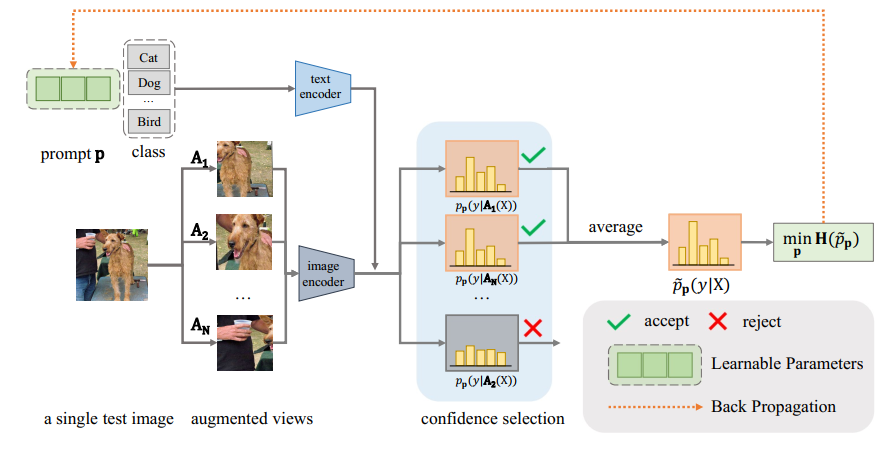

Figure 1: Test-time Prompt Tuning (TPT) for image classification. We tune adaptive prompts on
the fly with a single test sample, without the need for additional training data or annotations. TPT
optimizes the prompt to encourage consistent predictions across augmented views by minimizing the
marginal entropy. We introduce confidence selection to filter out noisy augmentations.

In [ ]:
import torch
import torch.nn as nn
from CLIP import clip
from CLIP.clip.simple_tokenizer import SimpleTokenizer as _Tokenizer


class TextEncoder(nn.Module):
    def __init__(self, clip_model):
        super().__init__()
        self.transformer = clip_model.transformer
        self.positional_embedding = clip_model.positional_embedding
        self.ln_final = clip_model.ln_final
        self.text_projection = clip_model.text_projection

    def forward(self, prompts, tokenized_prompts):
        x = prompts + self.positional_embedding
        x = x.permute(1, 0, 2)  # [batch_size, n_ctx, transformer.width] -> [n_ctx, batch_size, transformer.width]
        x = self.transformer(x)
        x = x.permute(1, 0, 2)  # [n_ctx, batch_size, transformer.width] -> [batch_size, n_ctx, transformer.width]
        x = self.ln_final(x)

        # Take features from the eot embedding (eot_token is the highest number in each sequence)
        x = x[torch.arange(x.shape[0]), tokenized_prompts.argmax(dim=-1)] @ self.text_projection

        return x
    
class PromptLearner(nn.Module):
    def __init__(self, clip_model, classnames, n_ctx, ctx_init, class_token_position, csc=False):
        super().__init__()
        n_cls = len(classnames)
        ctx_dim = clip_model.ln_final.weight.shape[0]
        clip_imsize = clip_model.visual.input_resolution
        _tokenizer = _Tokenizer()

        # Use given words to initialize context vectors
        if ctx_init:
            ctx_init = ctx_init.replace("_", " ")
            n_ctx = len(ctx_init.split(" "))
            prompt = clip.tokenize(ctx_init).to(clip_model.token_embedding.weight.device)
            with torch.no_grad():
                embedding = clip_model.token_embedding(prompt)
            ctx_vectors = embedding[0, 1 : 1 + n_ctx, :]
            prompt_prefix = ctx_init
        else:
            if csc:
                print("Initializing class-specific contexts")
                ctx_vectors = torch.empty(n_cls, n_ctx, ctx_dim)
            else:
                print("Initializing a generic context")
                ctx_vectors = torch.empty(n_ctx, ctx_dim)

            torch.nn.init.normal_(ctx_vectors, std=0.02)
            prompt_prefix = " ".join(["X"] * n_ctx)

        print(f"Initial context: '{prompt_prefix}'")
        print(f"Number of context words (tokens): {n_ctx}")

        self.ctx_init_state = ctx_vectors.detach().clone()
        # These are the `prompts` we want to optimize
        self.ctx = nn.Parameter(ctx_vectors)

        classnames = [name.replace("_", " ") for name in classnames]
        name_lens = [len(_tokenizer.encode(name)) for name in classnames]
        prompts = [prompt_prefix + " " + name + "." for name in classnames]

        tokenized_prompts = torch.cat([clip.tokenize(p) for p in prompts]).to(clip_model.token_embedding.weight.device)

        with torch.no_grad():
            embedding = clip_model.token_embedding(tokenized_prompts)

        # These token vectors will be saved when in save_model(),
        # but they should be ignored in load_model() as we want to use
        # those computed using the current class names
        self.register_buffer("token_prefix", embedding[:, :1, :])  # SOS
        self.register_buffer("token_suffix", embedding[:, 1 + n_ctx :, :])  # CLS, EOS

        self.n_cls = n_cls
        self.n_ctx = n_ctx
        self.tokenized_prompts = tokenized_prompts
        self.name_lens = name_lens
        self.class_token_position = class_token_position

    def forward(self):
        prefix = self.token_prefix
        suffix = self.token_suffix
        ctx = self.ctx
        
        # If CoOp, expand the ctx for all classes
        if ctx.dim() == 2:
            ctx = ctx.unsqueeze(0).expand(self.n_cls, -1, -1)
        
        if self.class_token_position == "end":
            prompts = torch.cat(
                [
                    prefix,  # (n_cls, 1, dim)
                    ctx,     # (n_cls, n_ctx, dim)
                    suffix,  # (n_cls, *, dim)
                ],
                dim=1,
            )

        elif self.class_token_position == "middle":
            half_n_ctx = self.n_ctx // 2
            prompts = []
            for i in range(self.n_cls):
                name_len = self.name_lens[i]
                prefix_i = prefix[i : i + 1, :, :]
                class_i = suffix[i : i + 1, :name_len, :]
                suffix_i = suffix[i : i + 1, name_len:, :]
                ctx_i_half1 = ctx[i : i + 1, :half_n_ctx, :]
                ctx_i_half2 = ctx[i : i + 1, half_n_ctx:, :]
                prompt = torch.cat(
                    [
                        prefix_i,     # (1, 1, dim)
                        ctx_i_half1,  # (1, n_ctx//2, dim)
                        class_i,      # (1, name_len, dim)
                        ctx_i_half2,  # (1, n_ctx//2, dim)
                        suffix_i,     # (1, *, dim)
                    ],
                    dim=1,
                )
                prompts.append(prompt)
            prompts = torch.cat(prompts, dim=0)

        elif self.class_token_position == "front":
            prompts = []
            for i in range(self.n_cls):
                name_len = self.name_lens[i]
                prefix_i = prefix[i : i + 1, :, :]
                class_i = suffix[i : i + 1, :name_len, :]
                suffix_i = suffix[i : i + 1, name_len:, :]
                ctx_i = ctx[i : i + 1, :, :]
                prompt = torch.cat(
                    [
                        prefix_i,  # (1, 1, dim)
                        class_i,   # (1, name_len, dim)
                        ctx_i,     # (1, n_ctx, dim)
                        suffix_i,  # (1, *, dim)
                    ],
                    dim=1,
                )
                prompts.append(prompt)
            prompts = torch.cat(prompts, dim=0)

        else:
            raise ValueError

        return prompts
    
    def reset(self):
        ctx_vectors = self.ctx_init_state
        with torch.no_grad():
            self.ctx.copy_(ctx_vectors) # to be optimized

class OurCLIP(nn.Module):

    def __init__(self, classnames, n_ctx, ctx_init, class_token_position, backbone="RN50", csc=False):
        super().__init__()
        clip_model, _ = clip.load(backbone)
        clip_model = clip_model.float()
        
        self.prompt_learner = PromptLearner(clip_model, classnames, n_ctx, ctx_init, class_token_position, csc=csc)
        self.tokenized_prompts = self.prompt_learner.tokenized_prompts
        self.encode_text = clip_model.encode_text
        self.image_encoder = clip_model.visual
        self.text_encoder = TextEncoder(clip_model)
        self.logit_scale = clip_model.logit_scale

    def forward(self, image):
        image_features = self.image_encoder(image)

        prompts = self.prompt_learner()
        tokenized_prompts = self.tokenized_prompts
        text_features = self.text_encoder(prompts, tokenized_prompts)

        image_features = image_features / image_features.norm(dim=-1, keepdim=True)
        text_features = text_features / text_features.norm(dim=-1, keepdim=True)

        logit_scale = self.logit_scale.exp()
        logits = logit_scale * image_features @ text_features.t()

        return logits, text_features
    
    def reset(self):
        self.prompt_learner.reset()


# 5. CoCa (Contrastive Captioner)

CoCa focuses on pretraining image-text foundation models for computer vision tasks. It is a minimalist model that merges the capabilities of contrastive approaches (like CLIP) and generative methods (like SimVLM). CoCa's design includes an image-text encoder-decoder framework optimized with both contrastive loss and captioning loss, facilitating efficient computation and high performance in various tasks.

### 5.1 Introduction

The goal of CoCa is to unify different paradigms, such as single-encoder models focusing on image classification, dual-encoder models leveraging contrastive loss for image-text pairs, and encoder-decoder models for generative pretraining, into a single model that can efficiently handle both vision and vision-language tasks.

<img src='source/images/coca_fig1.png' width=80%>

Figure 4: Overview of Contrastive Captioners (CoCa) pretraining as image-text foundation models.
The pretrained CoCa can be used for downstream tasks including visual recognition, vision-language
alignment, image captioning and multimodal understanding with zero-shot transfer, frozen-feature
evaluation or end-to-end finetuning

### 5.2 Model Architecture and Objectives

CoCa's architecture includes:

- Image Encoder: Transforms images into latent representations.
- Text Decoder: Split into two parts—unimodal and multimodal. The unimodal decoder layers process text independently, while the multimodal layers integrate image features through cross-attention.
- Contrastive Loss: Applied between unimodal image and text embeddings to align their representations.
- Captioning Loss: Applied to the outputs of the multimodal decoder to predict text tokens autoregressively.

<img src='source/images/coca_fig2.png' width=50%>

Figure 5: Detailed illustration of CoCa architecture. A simple encoder-decoder approach that seamlessly combines the three training paradigms

Similar to standard image-text encoderdecoder models, CoCa encodes images to latent representations by a neural network encoder, for
example, vision transformer (ViT), and decodes texts with a causal masking transformer decoder. Unlike standard decoder transformers, CoCa omits cross-attention in the first half of the decoder layers to encode unimodal text representations, and cascades the rest of the decoder layers, cross-attending to the image encoder for multimodal image-text representations. As a result, the CoCa decoder simultaneously produces both unimodal and multimodal text representations that allow us to apply both contrastive and generative objectives:

$ L_{CoCa} = λ_{Con} · L_{Con} + λ_{Cap} · L_{Cap} $

where $ λ_{Con} $ and $ λ_{Cap} $ are loss weighting hyper-parameters, $ L_{Con} $ is the Dual-Encoder Contrastive Learning loss and $ L_{Cap} $ is the Encoder-Decoder Captioning loss.

### 5.3. Pretraining Approach

CoCa is pretrained on both web-scale alt-text data and annotated images, treating all labels as text. This unified approach leverages natural language supervision for comprehensive representation learning.

### 5.4. Performance and Results
CoCa demonstrates state-of-the-art performance across a range of tasks, including:

- Visual Recognition: Achieves 86.3% zero-shot top-1 accuracy on ImageNet and 91.0% with fine-tuning.
- Crossmodal Retrieval: Excels in tasks like MSCOCO and Flickr30K retrieval.
- Multimodal Understanding: Shows strong results in VQA, SNLI-VE, and NLVR2.
- Image Captioning: Performs well on datasets like MSCOCO and NoCaps.

### 5.5. Methodology
CoCa's training involves a single stage that integrates contrastive learning and captioning. The model's architecture enables efficient computation and effective learning of both unimodal and multimodal representations.

### 5.6. Conclusion

CoCa sets a new benchmark in image-text pretraining by combining contrastive and generative objectives in a streamlined architecture. Its versatility and high performance across various tasks highlight the potential of unified pretraining models in advancing computer vision and vision-language understanding.

# 6. Our Approach
We propose an ensemble model that combines the strengths of the afore mentioned methods with the additional contribution of CoCa. Given an image we generate a set of augmentations and filter them based on the entropy of the predictions. We then generate captions corresponding to the filtered images using [CoCa](https://arxiv.org/abs/2205.01917) (Contrastive Captioner) and stack the logits of the filtered images. After doing so we apply the TPT step and minimise the entropy of the stacked logits. After backpropagatin we generate a final prediction and reset the network and the optimizer.

### 6.1. Image Augmentations
We generate a set of augmentations for each image in the batch. We augment the images using [augmix](https://arxiv.org/abs/1912.02781) and then randomly choose from horizontal flip, random vertical flip and random crop augmentations to apply again.

### 6.2. Filtering
We filter the images based on the entropy of the predictions. We only keep the **10th percentile** of the images with the lowest entropy according to the ablation study in **TPT**.

### 6.3. Caption Generation
We generate captions for the filtered images using CoCa which is a pretrained model that generates captions for images using a contrastive loss. The captions generated by CoCa provide a more detailed and informative description of the content of the image, often capturing fine-grained details and multiple objects present in the image. We then work out the similarity between the captions and the prompt plus the class names. A first attempt leveraged the CLIP text encoder to determine a similarity score but this failed to grasp similarity between **hypernyms** and **hyponyms** e.g. between 'dog' and 'pug'. Hence we employed the text encoder from CoCa which was able to better recognise these relationships.

The choice of using CoCa was related to memory constraints and to provide greater similarity between the underlying backbones and architectures involved in the classification pipeline. However, future work could leverage other captioning models such as [LLava](https://arxiv.org/abs/2304.08485), [BLIP](https://arxiv.org/abs/2201.12086) or the more recent [BLIP-2](https://arxiv.org/abs/2301.12597).

### 6.4. Stacking
To stack the logits we tried three different approaches: a standard deviation based approach proposed by Yang. et al. [Image-Caption Encoding for Improving Zero-Shot Generalisation](https://arxiv.org/pdf/2402.02662), a harmonic mean of the logits (ours) and an **entropy-weighted average** of the logits (ours).

Let $f$ be the logits of the CLIP model, $f_{caption}$ be the logits of the CoCa model, $\sigma$ be the standard deviation, $H$ be the entropy and $\alpha$ be a normalising weight.

The first approach calculates the standard deviation of the caption logits and then adds a re-weighted version of the caption logits to the clip logits.

$ f = f + \alpha \cdot \sigma(f_{caption}) \cdot f_{caption} $

The second approach calculates the harmonic mean of the two logits. However this approach has shown to be less effective than the other two as the ensemble is suppose to combine the strengths of the two models to compensate for each other weaknesses, whereas the harmonic punishes discrepancy between the two models which is when our approach tries to be most effective.

$ f = \frac{2 \cdot f \cdot f_{caption}}{f + f_{caption}} $

The third approach calculates the entropy of the caption logits and CLIP logits and then calculates the weighted average of the two logits based on the entropy of the caption logits.

$ A = \frac{1}{1 + H({f})} $ Weight for CLIP logits

$ B = \frac{1}{1 + H({f_{caption}})} $ Weight for caption logits

$ C = A + B $ Normalising factor for the two weights

$ f = \frac{A}{C} f + \frac{B}{C}f_{caption} $ Weighted average of the two logits


# 7. Project Setup

To run this notebook, you need to install the required dependencies. You can do this by running the following commands in your terminal:

Step 1

Download project libraries

Step 2

Import libraries

Step 3

Download resources:
- ImageNetA
- ImageNetV2
- CoOp pretrained weights

In [ ]:
! pip install -r requirements.txt

In [ ]:
%cd DS-DLProject

### Import libraries

In [ ]:
import gdown
import io
import matplotlib.pyplot as plt
import numpy as np
import os
import requests
import sys
import tarfile
import torch, torchvision
torchvision.disable_beta_transforms_warning()
import torch.amp
import torchvision.transforms as transforms
import zipfile

from CLIP import clip
from COOP.models import OurCLIP
from COOP.utils import get_optimizer, get_loss_function, log_values
from COOP.functions import training_step, test_step
from COOP.dataloader import get_data

from PIL import Image
from torch.utils.tensorboard import SummaryWriter
try:
    from torchvision.transforms import InterpolationMode
    BICUBIC = InterpolationMode.BICUBIC
except ImportError:
    BICUBIC = Image.BICUBIC
from tqdm import tqdm

from loaders import Augmixer
from utils import entropy, batch_report, make_histogram
from copy import deepcopy
from open_clip import factory

### Download ImagenetA and ImagenetV2

In [ ]:
# Define the URL for the ImageNet-A dataset
url_a = "https://people.eecs.berkeley.edu/~hendrycks/imagenet-a.tar"
url_v2 = "https://huggingface.co/datasets/vaishaal/ImageNetV2/resolve/main/imagenetv2-matched-frequency.tar.gz"

# Define the local filename to save the dataset
local_filename_a = "imagenet-a.tar"
local_filename_v2 = "imagenetv2-matched-frequency-format-val.tar"

# download a file from a URL
def download_file(url, local_filename):
    with requests.get(url, stream=True) as r:
        r.raise_for_status()
        with open(local_filename, 'wb') as f:
            for chunk in r.iter_content(chunk_size=8192):
                f.write(chunk)

def extract_tar_file(file_name, output_dir='.'):
    with tarfile.open(file_name, 'r') as tar:
        tar.extractall(path=output_dir)

# Download the imagenet-a dataset
download_file(url_a, local_filename_a)

extract_tar_file(local_filename_a, './data')

# Download the imagenet-v2 dataset
download_file(url_v2, local_filename_v2)

extract_tar_file(local_filename_v2, './data')

# Clean up the tar files
os.remove(local_filename_a)
os.remove(local_filename_v2)

print("Download and extraction complete.")

### Download CoOp pretrained weights

In [ ]:
# Create a directory
output_dir = './bin/coop'
os.makedirs(output_dir, exist_ok=True)

# Download the models from the link given in the original github repository
url = 'https://drive.google.com/uc?id=18ypxfd82RR0pizc5MM1ZWDYDk4j0BtPF'
output_file = os.path.join(output_dir, 'backbones_COOP.zip')
gdown.download(url, output_file, quiet=False)

# Path to the downloaded zip file
zip_file = os.path.join(output_dir, 'backbones_COOP.zip')

# Extract the contents
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(output_dir)

os.remove(zip_file)


In [ ]:
%mv bin/coop/to_gdrive/* bin/coop/
%rmdir bin/coop/to_gdrive/
%ls bin/coop

# Implementation Details


The whole project is built on top of the <cite>tpt_eval.py</cite> file. The file is structured in order to make the main required imports and it implements the **Test Time Adaptation** step. There are two main functions:
1. tta_net_train 
2. tpt_train_loop

In order to guide the update step which perform gradient descent to update the prompt lerner parameters, we use _avg_entropy_ as loss function as shown in [Test-Time Prompt Tuning for Zero-Shot Generalization in Vision-Language Models](https://arxiv.org/pdf/2209.07511).

In [ ]:
def avg_entropy(outputs):
    logits = outputs - outputs.logsumexp(dim=-1, keepdim=True) # logits = outputs.log_softmax(dim=1) [N, 1000]
    avg_logits = logits.logsumexp(dim=0) - np.log(logits.shape[0]) # avg_logits = logits.mean(0) [1, 1000]
    min_real = torch.finfo(avg_logits.dtype).min
    avg_logits = torch.clamp(avg_logits, min=min_real)
    return -(avg_logits * torch.exp(avg_logits)).sum(dim=-1)

We use AdamW and set the learning rate to 0.005, as done in TPT.

In [6]:
def get_optimizer(params, lr):
    optimizer = torch.optim.AdamW(params, lr)
    return optimizer

We define a function to select, over a tensor of augmentation of an image, the best ones based on entropy score: we filter out all the entries over a certain entropy threshold. Here is where _confidence selection_ comes into play

In [8]:
def filter_on_entropy(inputs:torch.Tensor, outputs:torch.Tensor, p_percentile:int=10, return_original:bool=False):
    """
    Return all inputs and outputs where prediction entropy is in the 'p' percentile
    :param: inputs: torch.Tensor: batch of inputs
    :param: outputs: torch.Tensor: batch of outputs
    :param: p_percentile: int: percentile threshold
    :param: return_original: bool: return the original image of the batch
    """

    p_threshold = np.percentile([entropy(t).item() for t in outputs], p_percentile)
    entropies = [entropy(t).item() for t in outputs]
    entropies = [0 if val > p_threshold else 1 for val in entropies]
    indices = torch.nonzero(torch.tensor(entropies)).squeeze(1)

    if return_original and 0 not in indices:
        torch.cat((torch.tensor([0]), indices))

    return inputs[indices], outputs[indices]

In [ ]:
class Captioner():
    def __init__(self, model_name, version, device):
        self.caption_model, _ , self.transform = open_clip.create_model_and_transforms(
            model_name=model_name, 
            pretrained=version, 
            cache_dir='./.dl-cache'
            )
        self.caption_model.to(device)
        self.tokenizer = open_clip.get_tokenizer(model_name)
        self.device = device
    
    def _tokenize(self, x: str) -> torch.Tensor:
        """
        Tokenizes the input text using the tokenizer.

        Args:
            x (str): The input text.

        Returns:
            torch.Tensor: The tokenized text.
        """
        x_tokenized = self.tokenizer(x).squeeze()
        start_token = 49406
        end_token = 49407
        assert x_tokenized[0] == start_token
        return x_tokenized[:list(x_tokenized).index(end_token)]
    
    def _generate_macro(self, im: torch.Tensor, prompt: int) -> torch.Tensor:
        """
        Generates captions for the input images.

        Args:
            im (torch.Tensor): The input images.
            prompt (int): The prompt for caption generation.

        Returns:
            torch.Tensor: The generated captions.
        """
        text=torch.ones((im.shape[0], 1), device=self.device, dtype=torch.long)*prompt

        generated = self.caption_model.generate(
                    im, 
                    text=text,
                    generation_type='top_p')
        return generated
    
    def get_test_transform(self) -> transforms.Compose:
        """
        Returns the test transformation for images.

        Returns:
            transforms.Compose: The test transformation.
        """
        return transforms.Compose(
            [transforms.Resize(size=224, max_size=None, antialias=None),
            transforms.CenterCrop(size=(224, 224)),
            transforms.ToTensor(),
            transforms.Normalize(mean=(0.48145466, 0.4578275, 0.40821073), std=(0.26862954, 0.26130258, 0.27577711))]
        )
    
    def generate_captions(self, images: torch.Tensor, prompt: int) -> List[str]:
        """
        Generates captions for the input images.

        Args:
            images (torch.Tensor): The input images.
            prompt (int): The prompt for caption generation.

        Returns:
            List[str]: The generated captions.
        """
        self.caption_model.eval()
        
        outputs = []
        prompt_extended = self._tokenize(prompt).to(self.device)
            
        generated = self._generate_macro( 
            images, 
            prompt_extended)
        
        assert len(generated) == len(images)
        for i in range(len(generated)):
            outputs.append(open_clip.decode(generated[i]).split("<end_of_text>")[0].replace("<start_of_text>", ""))
        return outputs

In [ ]:
def get_caption_logits(captioner:Captioner, captions, id2class):
    from open_clip import factory
    device = DEVICE
    classes = list(id2class.values())
    tokenizer = factory.get_tokenizer("coca_ViT-L-14")
    with torch.cuda.amp.autocast(), torch.no_grad():
        class_tokens = tokenizer([f"A photo of {cls}" for cls in classes])
        class_features = captioner.caption_model.encode_text(class_tokens.to(device), normalize=False)

        caption_tokens = tokenizer(captions)
        caption_features = captioner.caption_model.encode_text(caption_tokens.to(device))

        scale = captioner.caption_model.logit_scale.exp()
        caption_logits = F.normalize(caption_features) @ F.normalize(class_features).T


    return (caption_logits * scale).softmax(-1)

In [ ]:
def add_caption_loss(net: OurCLIP, captioner: Captioner, batch, text_features, id2classes, prompt="a ", ensamble_method="entropy", K=200, debug=False):
    """
    Adds caption loss to the filtered_outputs using the given captioner.

    Args:
        net (OurCLIP): The network used to generate the text features.
        captioner (Captioner): The captioner object used to generate captions.
        batch (tuple): Tuple containing filtered inputs and outputs, batch_idx and label
        text_features: The text features of the labels computed by the model.
        id2classes (dict): The mapping from class index to class name.
        prompt (str): The prompt used for generating captions. Default is "a ".
        _lambda (float): The value of lambda used for computing the weighted logit summation
        K (int): The number of top classes to consider. Default is 200.
        debug (bool): Whether to print debug information. Default is False.

    Returns:
    
        The updated filtered_outputs with caption loss added.
        The caption prediction from the average of all the logits
    """
    batch_idx, filtered_inputs, filtered_outputs, label = batch
    # Compute captions for each augmentation using coca functions
    device = filtered_inputs.device
    with torch.no_grad(), torch.cuda.amp.autocast():
        captions = captioner.generate_captions(filtered_inputs, prompt)
    
    # Encode all the captions using the clip encoder (batchfying the captions to save compute)
    # caption_tokens = clip.tokenize(captions).to(device)
    # caption_features = net.encode_text(caption_tokens).to(device)
    
    # caption_logits = net.logit_scale.exp()*(F.normalize(caption_features) @ text_features.T)
    # caption_logits = caption_logits.softmax(-1)
    caption_logits = get_caption_logits(captioner, captions, id2classes)
    image_logits = filtered_outputs

    # Compute the value of lambda following ice implementation row 193 main_ice.py
    assert K == 200, "For k != 200, function has to be implemented"

    # Lambda computed as a normalization term
    ice_scores = torch.zeros_like(image_logits)

    if ensamble_method == "std_dev":
        std_devs = torch.stack((image_logits.std(dim=1), caption_logits.std(dim=1)), dim=1)
        coef = 0.08 * F.normalize(std_devs, dim=1)
        coef = coef[:, 1].unsqueeze(1).expand(-1, K)
        # Sum the image and caption scores to obtain the ICE scores
        ice_scores = image_logits + coef * caption_logits
    elif ensamble_method == "entropy":
        for batch in range(image_logits.shape[0]):
            A = 1/(1 + entropy(image_logits[batch]).item())
            B = 1/(1 + entropy(caption_logits[batch]).item())
            C = A + B
            ice_scores[batch] = (A/C * image_logits[batch] + B/C * caption_logits[batch])
    elif ensamble_method == "harmonic_mean":
        for batch in range(image_logits.shape[0]):
            ice_scores[batch] = (2 * image_logits[batch] * caption_logits[batch]).div(image_logits[batch] + caption_logits[batch])
    else:
        raise ValueError("Ensamble method not implemented")

    caption_prediction = torch.mean(caption_logits, dim=0)
    if debug:
        caption_report(filtered_inputs, image_logits, caption_logits, ice_scores, label, captions, caption_prediction, id2classes, batch_idx)    

    if batch_idx % LOG_FREQUENCY == 0:
        caption_report(filtered_inputs, image_logits, caption_logits, ice_scores, label, captions, caption_prediction, id2classes, batch_idx)    
    return ice_scores

_tta_net_train_: is used to update the network weights according to the average entropy of the logits which comes from the network. 

In [ ]:
def tta_net_train(batch, net, optimizer, scaler, id2classes, device="cuda", captioner=None, debug=False):
    batch_idx, inputs, targets = batch

    inputs = inputs.to(device)
    targets = targets.to(device)

    # Forward pass
    outputs, text_features = net(inputs)
    outputs = outputs.softmax(dim=-1)

    filtered_inputs, filtered_outputs = filter_on_entropy(inputs, outputs, p_percentile=10, return_original=debug)
    if captioner is not None:
        batch = (batch_idx, filtered_inputs, filtered_outputs, targets)
        filtered_outputs = add_caption_loss(net, captioner, batch, text_features, id2classes, debug=debug, ensamble_method=ENSAMBLE_METHOD)

    avg_predictions = torch.mean(filtered_outputs, dim=0).unsqueeze(0)
    prediction_entropy = entropy(avg_predictions).item()

    optimizer.zero_grad()
    loss = avg_entropy(filtered_outputs)

    if scaler is None:        
        loss.backward()
        optimizer.step()
    else:
        with torch.cuda.amp.autocast():
            scaler.scale(loss).backward()
            scaler.step(optimizer)
            scaler.update()
    # show batch
    if batch_idx % LOG_FREQUENCY == 0:
        batch_report(filtered_inputs, filtered_outputs, avg_predictions, targets, id2classes, batch_n=batch_idx)
        
    prediction = avg_predictions.argmax(dim=1)
    return loss.item(), prediction, prediction_entropy


_tpt_train_loop_: is the main function which takes every element of the dataset, updates the network calling _tta_net_train_, evaluate the prediction with the new network and then it resets the network for the next sample.

In [ ]:
def tpt_train_loop(data_loader, net, optimizer, cost_function, scaler, writer, id2classes, device="cuda", captioner=None, debug=False, checkpoint=None):
    
    if checkpoint:
        offset, cumulative_loss, top1, top5, no_tpt_class_acc, tpt_class_acc = checkpoint
    else:
        offset = 0
        cumulative_loss = AverageMeter()
        top1 = AverageMeter()
        top5 = AverageMeter()

        no_tpt_class_acc = {c: AverageMeter() for c in id2classes.values()}
        tpt_class_acc = {c: AverageMeter() for c in id2classes.values()}
    
    loss_diff = 0.0
    optimizer_state = deepcopy(optimizer.state_dict())

    try:
        pbar = tqdm(data_loader, desc="Testing", position=0, leave=True, initial=offset, total=len(data_loader)+offset)
        for batch_idx, (inputs, targets, _) in enumerate(data_loader):
            batch_idx += offset # offset to continue from a checkpoint

            # Reset the prompt_learner to its initial state and the optimizer to its initial state
            with torch.no_grad():
                net.reset()
                optimizer.load_state_dict(optimizer_state)

            _loss, no_tpt_prediction, no_tpt_prediction_entropy = tta_net_train((batch_idx, inputs, targets), net, optimizer, scaler, id2classes, device=device, captioner=captioner, debug=debug)

            net.eval()
            with torch.no_grad():
                # Classification with the updated net
                inputs = inputs[0].unsqueeze(0).to(device)
                targets = targets.to(device)
                outputs, _ = net(inputs)
                loss = cost_function(outputs, targets)
                prediction = outputs.argmax(dim=1)
                prediction_entropy = entropy(prediction).item()

                cumulative_loss.update(loss.item())

            # Update accuracies
            _key = id2classes[targets.item()]
            if no_tpt_prediction.item() == targets.item():
                no_tpt_class_acc[_key].update(1)
            else:
                no_tpt_class_acc[_key].update(0)

            values, predictions = outputs.topk(5)
            if prediction == targets:
                top1.update(1)
                tpt_class_acc[_key].update(1)
            else:
                top1.update(0)
                tpt_class_acc[_key].update(0)

            if targets.item() in predictions:
                top5.update(1)
            else:
                top5.update(0)

            loss_diff =  _loss - loss.item() # comparison of loss with and without TPT
            entropy_diff = prediction_entropy - no_tpt_prediction_entropy # comparison of entropy with and without TPT
            # Log Values
            writer.add_scalar("Delta_loss/test", loss_diff, batch_idx)
            writer.add_scalar("Delta_entropy/test", entropy_diff, batch_idx)
            writer.add_scalar("Top-1", top1.get_avg(), batch_idx)
            writer.add_scalar("Top-5", top5.get_avg(), batch_idx)

            if batch_idx % LOG_FREQUENCY == 0 :#and batch_idx > 10:
                logger.info(f"[LOSS] Batch {batch_idx} - Delta loss: {loss_diff:.5f}, Delta entropy: {entropy_diff:.5f}")
                no_tpt_accuracies, accuracies = compute_accuracies(no_tpt_class_acc, tpt_class_acc)
                histogram = make_histogram(no_tpt_accuracies, accuracies, 
                                        'No TPT', 'TPT', save_path=f"runs/{RUN_NAME}/class_accuracy%{batch_idx}e.png")
                writer.add_image(f"Class accuracies%{batch_idx}e", histogram, batch_idx, dataformats="HWC")
                logger.info(f"[ACC] Batch num:{batch_idx} - Top1: {top1.get_avg()}, Top5: {top5.get_avg()}")

                dump_object = batch_idx, cumulative_loss, top1, top5, no_tpt_class_acc, tpt_class_acc
                pickle.dump(dump_object, open(f"runs/{RUN_NAME}/checkpoint%{batch_idx}.pkl", "wb"))
            
            
            pbar.set_postfix(test_loss=loss.item(), top1=top1.get_avg(), top5=top5.get_avg())
            pbar.update(1)

    except KeyboardInterrupt:
        print("User keyboard interrupt")
    if batch_idx % LOG_FREQUENCY != 0 or batch_idx == len(data_loader) + offset:#and batch_idx > 10:
        logger.info(f"[LOSS] Batch {batch_idx} - Delta loss: {loss_diff:.5f}, Delta entropy: {entropy_diff:.5f}")
        no_tpt_accuracies, accuracies = compute_accuracies(no_tpt_class_acc, tpt_class_acc)
        histogram = make_histogram(no_tpt_accuracies, accuracies, 
                                'No TPT', 'TPT', save_path=f"runs/{RUN_NAME}/class_accuracy%{batch_idx}e.png")
        writer.add_image(f"Class accuracies%{batch_idx}e", histogram, batch_idx, dataformats="HWC")
        logger.info(f"[ACC] Batch num:{batch_idx} - Top1: {top1.get_avg()}, Top5: {top5.get_avg()}")

        dump_object = batch_idx, cumulative_loss, top1, top5, no_tpt_class_acc, tpt_class_acc
        pickle.dump(dump_object, open(f"runs/{RUN_NAME}/checkpoint%{batch_idx}.pkl", "wb"))

    # Draw histogram of class accuracies
    no_tpt_accuracies, accuracies = compute_accuracies(no_tpt_class_acc, tpt_class_acc)
    image = make_histogram(no_tpt_accuracies, accuracies, 'No TPT','TPT', save_path=f"runs/{RUN_NAME}/accuracy_by_class.png")
    image = make_histogram(no_tpt_accuracies, accuracies, 'No TPT','TPT', save_path=f"runs/{RUN_NAME}/accuracy_by_worst_class.png", worst_case=True)
    
    writer.add_image("Class accuracies", image, 0, dataformats="HWC")

    return cumulative_loss.get_avg() , top1.get_avg()
    

We create the class AugmixFolder

In [ ]:
class AugmixFolder(datasets.ImageFolder):
    def __init__(self, root,transform):
        super(AugmixFolder, self).__init__(root, transform=transform)
        self.transform = transform
        
    def __getitem__(self, index):
        img, label = super(AugmixFolder, self).__getitem__(index)
        path = self.imgs[index][0]
        if isinstance(self.transform, Augmixer):
            return img.squeeze(0), label, path
        return img, label, path

We define a function to retrieve the data we downloaded before 

In [ ]:
def get_data(dataset_name, batch_size, transform, shuffle=True, train_size=0.8, val_size=0.1, from_idx=0):
    """
    Loads the dataset and splits it into training, validation and test sets. Available datsets:
    ["cifar10", "cifar100", "imagenet_v2", "imagenet_a"]
    :param dataset_name: str: name of the dataset
    :param batch_size: int: batch size
    :param transform: function: preprocessing function
    :param shuffle: bool: shuffle the dataset
    :param train_size: float: proportion of the dataset to include in the training set
    :param val_size: float: proportion of the dataset to include in the validation set
    :return: tuple: training, validation and test dataloaders
    """
    if dataset_name == "cifar10":
        download = not (os.path.exists(os.path.join("data/cifar-10-python")))
        dataset = AugmixFolder(root="./data", download=download, transform=transform)
        id2class = {dataset.class_to_idx[c] : c for c in dataset.classes}
    elif dataset_name == "cifar100":
        download = not (os.path.exists(os.path.join("data/cifar-100-python")))
        dataset = AugmixFolder(root="./data", download=download, transform=transform)
        id2class = {dataset.class_to_idx[c] : c for c in dataset.classes}
    elif dataset_name == "imagenet_v2":
        dataset = AugmixFolder(root="./data/imagenetv2-matched-frequency-format-val", transform=transform)
        dataset.class_to_idx = {cls: i for i, cls in enumerate(dataset.classes)}
        id2class = {dataset.class_to_idx[c] : py_vars.num2class_v2[int(c)] for c in dataset.classes}
    elif dataset_name == "imagenet_a":
        dataset = AugmixFolder(root="./data/imagenet-a", transform=transform)
        dataset.class_to_idx = {cls: i for i, cls in enumerate(dataset.classes)}
        id2class = {dataset.class_to_idx[c] : py_vars.num2class[c] for c in dataset.classes}
    else:
        raise ValueError(f"Unknown dataset {dataset_name}")
    
    n = len(dataset)
    n_train = int(train_size * n)
    n_val = int(val_size * n)
    n_test = n - n_train - n_val
    
    if(n_train + n_val == 0):
        train_loader, val_loader = None, None
        if batch_size == 1:
            test_loader = data.DataLoader(dataset, batch_size=batch_size, 
                                          sampler=CustomSampler(range(n), from_idx=from_idx), collate_fn=my_collate)
        else:
            test_loader = data.DataLoader(dataset, batch_size=batch_size, shuffle=shuffle,
                                          sampler=CustomSampler(range(n), from_idx=from_idx))
    else:
        train_dataset, val_dataset, test_dataset = random_split(dataset, [n_train, n_val, n_test])

        train_loader = data.DataLoader(train_dataset, batch_size=batch_size, shuffle=shuffle, collate_fn=my_collate)
        val_loader = data.DataLoader(val_dataset, batch_size=batch_size, shuffle=shuffle, collate_fn=my_collate)
        test_loader = data.DataLoader(test_dataset, batch_size=batch_size, shuffle=shuffle, collate_fn=my_collate)

    return train_loader, val_loader, test_loader, list(id2class.values()), id2class

In the main we load and augment the data, we load CLIP and COOP. We use AdamW as optimizer

In [ ]:
def main(
    dataset_name="imagenet_a",
    backbone="ViT-B/16",
    device="mps",
    batch_size=64,
    learning_rate=0.005,
    run_name=RUN_NAME,
    n_ctx=4,
    ctx_init="a_photo_of_a",
    class_token_position="end",
    csc=False,
    ice_loss=True,
    debug=DEBUG
):
    DEBUG = debug
    RUN_NAME = run_name

    checkpoints = [file for file in os.listdir(f"runs/{RUN_NAME}") if file.startswith("checkpoint")]
    if len(checkpoints) > 0:
        files = sorted(checkpoints,
                        key=lambda x: int(x.split("%")[1].split(".")[0]),
                        reverse=True)
        checkpoint = pickle.load(open(f"runs/{RUN_NAME}/{files[0]}", "rb"))
        from_idx = checkpoint[0]
    else:
        checkpoint = None
        from_idx = 0

    seed = 0
    print("Using manual seed {}".format(seed))
    torch.manual_seed(seed)
    # Create a logger for the experiment
    run_name = RUN_NAME
    writer = SummaryWriter(log_dir=f"runs/{run_name}")

    _, preprocess = clip.load(backbone, device=device)
    
    data_transform = Augmixer(preprocess, batch_size, augmix=True, severity=1)
    # Get dataloaders
    _, _, test_loader, classnames, id2class = get_data(
        dataset_name, 1, data_transform, train_size=0, val_size=0, from_idx=from_idx
    )    

    # Instantiate the network and move it to the chosen device (GPU)
    net = OurCLIP(
        classnames=classnames,
        n_ctx=n_ctx,
        ctx_init=ctx_init,
        class_token_position=class_token_position,
        backbone=backbone,
        csc=csc,
    ).to(device)

    load_pretrained_coop(backbone, net, device)

    print("Turning off gradients in both the image and the text encoder")
    for name, param in net.named_parameters():
        if "prompt_learner" not in name:
            param.requires_grad_(False)

    print(f"Total parameters: {sum(p.numel() for p in net.parameters()):,}")
    print(
        f"Total trainable parameters: {sum(p.numel() for p in net.parameters() if p.requires_grad):,}"
    )

    trainable_param = net.prompt_learner.parameters()
    optimizer = get_optimizer(trainable_param, learning_rate)

    cost_function = get_loss_function()

    if device == 'cuda':
        scaler = torch.cuda.amp.GradScaler(init_scale=1000)
    else:
        scaler = None

    # Instantiate the captioner if needed
    captioner = None
    if ice_loss:
        model_name = "coca_ViT-L-14"
        version = "laion2B-s13B-b90k"
        captioner = Captioner(model_name=model_name, version=version, device=device)

    print(f"Beginning testing with TPT + ice_loss={ice_loss}:")
    test_loss, test_accuracy = tpt_train_loop(test_loader, net, optimizer, cost_function, scaler, writer, id2classes=id2class, device=device, captioner=captioner, debug=debug, checkpoint=checkpoint)
    print(f"\tTest loss {test_loss:.5f}, Test accuracy {test_accuracy:.2f}")
    
    create_run_info(dataset_name, backbone, ice_loss, test_accuracy, run_name, ENSAMBLE_METHOD)
    
    writer.close()